In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('training_dataset.csv')

In [6]:
df.isnull().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64

In [34]:
coba = df.drop(columns=['pekerjaan', 'gagal_bayar_sebelumnya', 'jenis_kontak', 'bulan_kontak_terakhir', 'hari_sejak_kontak_sebelumnya',
         'hasil_kampanye_sebelumnya', 'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen', 'suku_bunga_euribor_3bln',
         'jumlah_pekerja'
         , 'berlangganan_deposito'])

coba.columns

Index(['customer_number', 'usia', 'status_perkawinan', 'pendidikan',
       'pinjaman_rumah', 'pinjaman_pribadi', 'hari_kontak_terakhir',
       'jumlah_kontak_kampanye_ini', 'jumlah_kontak_sebelumnya',
       'indeks_kepercayaan_konsumen', 'pulau'],
      dtype='object')

In [35]:
#print every categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(col)

pekerjaan
status_perkawinan
pendidikan
gagal_bayar_sebelumnya
pinjaman_rumah
pinjaman_pribadi
jenis_kontak
bulan_kontak_terakhir
hari_kontak_terakhir
hasil_kampanye_sebelumnya
pulau


In [36]:
#print every numerical column
for col in df.select_dtypes(include=[np.number]).columns:
    print(col)

customer_number
usia
jumlah_kontak_kampanye_ini
hari_sejak_kontak_sebelumnya
jumlah_kontak_sebelumnya
tingkat_variasi_pekerjaan
indeks_harga_konsumen
indeks_kepercayaan_konsumen
suku_bunga_euribor_3bln
jumlah_pekerja
berlangganan_deposito


In [37]:
df['berlangganan_deposito'].value_counts()

berlangganan_deposito
0    20302
1     2614
Name: count, dtype: int64

In [33]:
#plot all numerical features
def plot_numerical_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    for feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=df, x=feature, hue=df['berlangganan_deposito'], common_norm=False, fill=True, alpha=0.5)
        plt.title(f'Conditional Distribution of {feature}')
        plt.show()
#plot all categorical features
def plot_categorical_features(df):
    categorical_features = df.select_dtypes(include=[object]).columns.tolist()
    for feature in categorical_features:
        top_categories = df[feature].value_counts().nlargest(5).index
        df[f'{feature}'] = df[feature].where(
        df[feature].isin(top_categories), 
        'Other')
        plt.figure(figsize=(20, 6))
    
    # Use countplot for categorical x, hue by price bins
        sns.histplot(
            data=df,
            x=feature,
            hue='berlangganan_deposito',
            palette='viridis',
            stat='density',
            common_norm=False,
            alpha=0.8,
            multiple='dodge'  # Side-by-side bars
        )
    
        plt.title(f'Distribution of {feature} by Price Quartiles')
        plt.xticks(rotation=45)  # Rotate long category names
        plt.legend(title='Price Quartile')
        plt.show()
#plot all features
def plot_all_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=[object]).columns.tolist()
    
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()
    
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.grid()
        plt.show()

pekerjaan
status_perkawinan
pendidikan
gagal_bayar_sebelumnya
pinjaman_rumah
pinjaman_pribadi
jenis_kontak
bulan_kontak_terakhir
hari_kontak_terakhir
hasil_kampanye_sebelumnya
pulau

In [39]:
from category_encoders import TargetEncoder


encoder1 = TargetEncoder()
encoder2 = TargetEncoder()
encoder3 = TargetEncoder()
encoder4 = TargetEncoder()
encoder5 = TargetEncoder()
encoder6 = TargetEncoder()
encoder7 = TargetEncoder()
encoder8 = TargetEncoder()
encoder9 = TargetEncoder()
encoder10 = TargetEncoder()
encoder11 = TargetEncoder()
encoder12 = TargetEncoder()
encoder13 = TargetEncoder()
encoder14 = TargetEncoder()

def apply_target_encoding(df, train=True):
    ret = df.copy()
    target_col = "berlangganan_deposito"
    if train:
        ret['pekerjaan'] = encoder1.fit_transform(ret['pekerjaan'], ret[target_col])
        ret['status_perkawinan'] = encoder2.fit_transform(ret['status_perkawinan'], ret[target_col])
        ret['pendidikan'] = encoder3.fit_transform(ret['pendidikan'], ret[target_col])
        ret['gagal_bayar_sebelumnya'] = encoder4.fit_transform(ret['gagal_bayar_sebelumnya'], ret[target_col])
        ret['pinjaman_rumah'] = encoder5.fit_transform(ret['pinjaman_rumah'], ret[target_col])
        ret['pinjaman_pribadi'] = encoder6.fit_transform(ret['pinjaman_pribadi'], ret[target_col])
        ret['jenis_kontak'] = encoder7.fit_transform(ret['jenis_kontak'], ret[target_col])
        ret['bulan_kontak_terakhir'] = encoder8.fit_transform(ret['bulan_kontak_terakhir'], ret[target_col])
        ret['hari_kontak_terakhir'] = encoder9.fit_transform(ret['hari_kontak_terakhir'], ret[target_col])
        ret['hasil_kampanye_sebelumnya'] = encoder10.fit_transform(ret['hasil_kampanye_sebelumnya'], ret[target_col])
        ret['pulau'] = encoder11.fit_transform(ret['pulau'], ret[target_col])
        # ret['kelompok_usia'] = encoder12.fit_transform(ret['kelompok_usia'], ret[target_col])
    else:
        ret['pekerjaan'] = encoder1.transform(ret['pekerjaan'])
        ret['status_perkawinan'] = encoder2.transform(ret['status_perkawinan'])
        ret['pendidikan'] = encoder3.transform(ret['pendidikan'])
        ret['gagal_bayar_sebelumnya'] = encoder4.transform(ret['gagal_bayar_sebelumnya'])
        ret['pinjaman_rumah'] = encoder5.transform(ret['pinjaman_rumah'])
        ret['pinjaman_pribadi'] = encoder6.transform(ret['pinjaman_pribadi'])
        ret['jenis_kontak'] = encoder7.transform(ret['jenis_kontak'])
        ret['bulan_kontak_terakhir'] = encoder8.transform(ret['bulan_kontak_terakhir'])
        ret['hari_kontak_terakhir'] = encoder9.transform(ret['hari_kontak_terakhir'])
        ret['hasil_kampanye_sebelumnya'] = encoder10.transform(ret['hasil_kampanye_sebelumnya'])
        ret['pulau'] = encoder11.transform(ret['pulau'])
        # ret['kelompok_usia'] = encoder12.transform(ret['kelompok_usia'])
    return ret

In [40]:
encoded_df = apply_target_encoding(df, True)

In [41]:
#cm
def plot_correlation_matrix(df):
    cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

In [42]:
def plot_mutual_info(df):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split

    X = df.drop(columns=['berlangganan_deposito'])
    y = df['berlangganan_deposito']



    # Calculate mutual information
    mi = mutual_info_classif(X, y, discrete_features=True)

    # Create a DataFrame for better visualization
    mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
    mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
    plt.title('Mutual Information between Features and Target')
    plt.show()

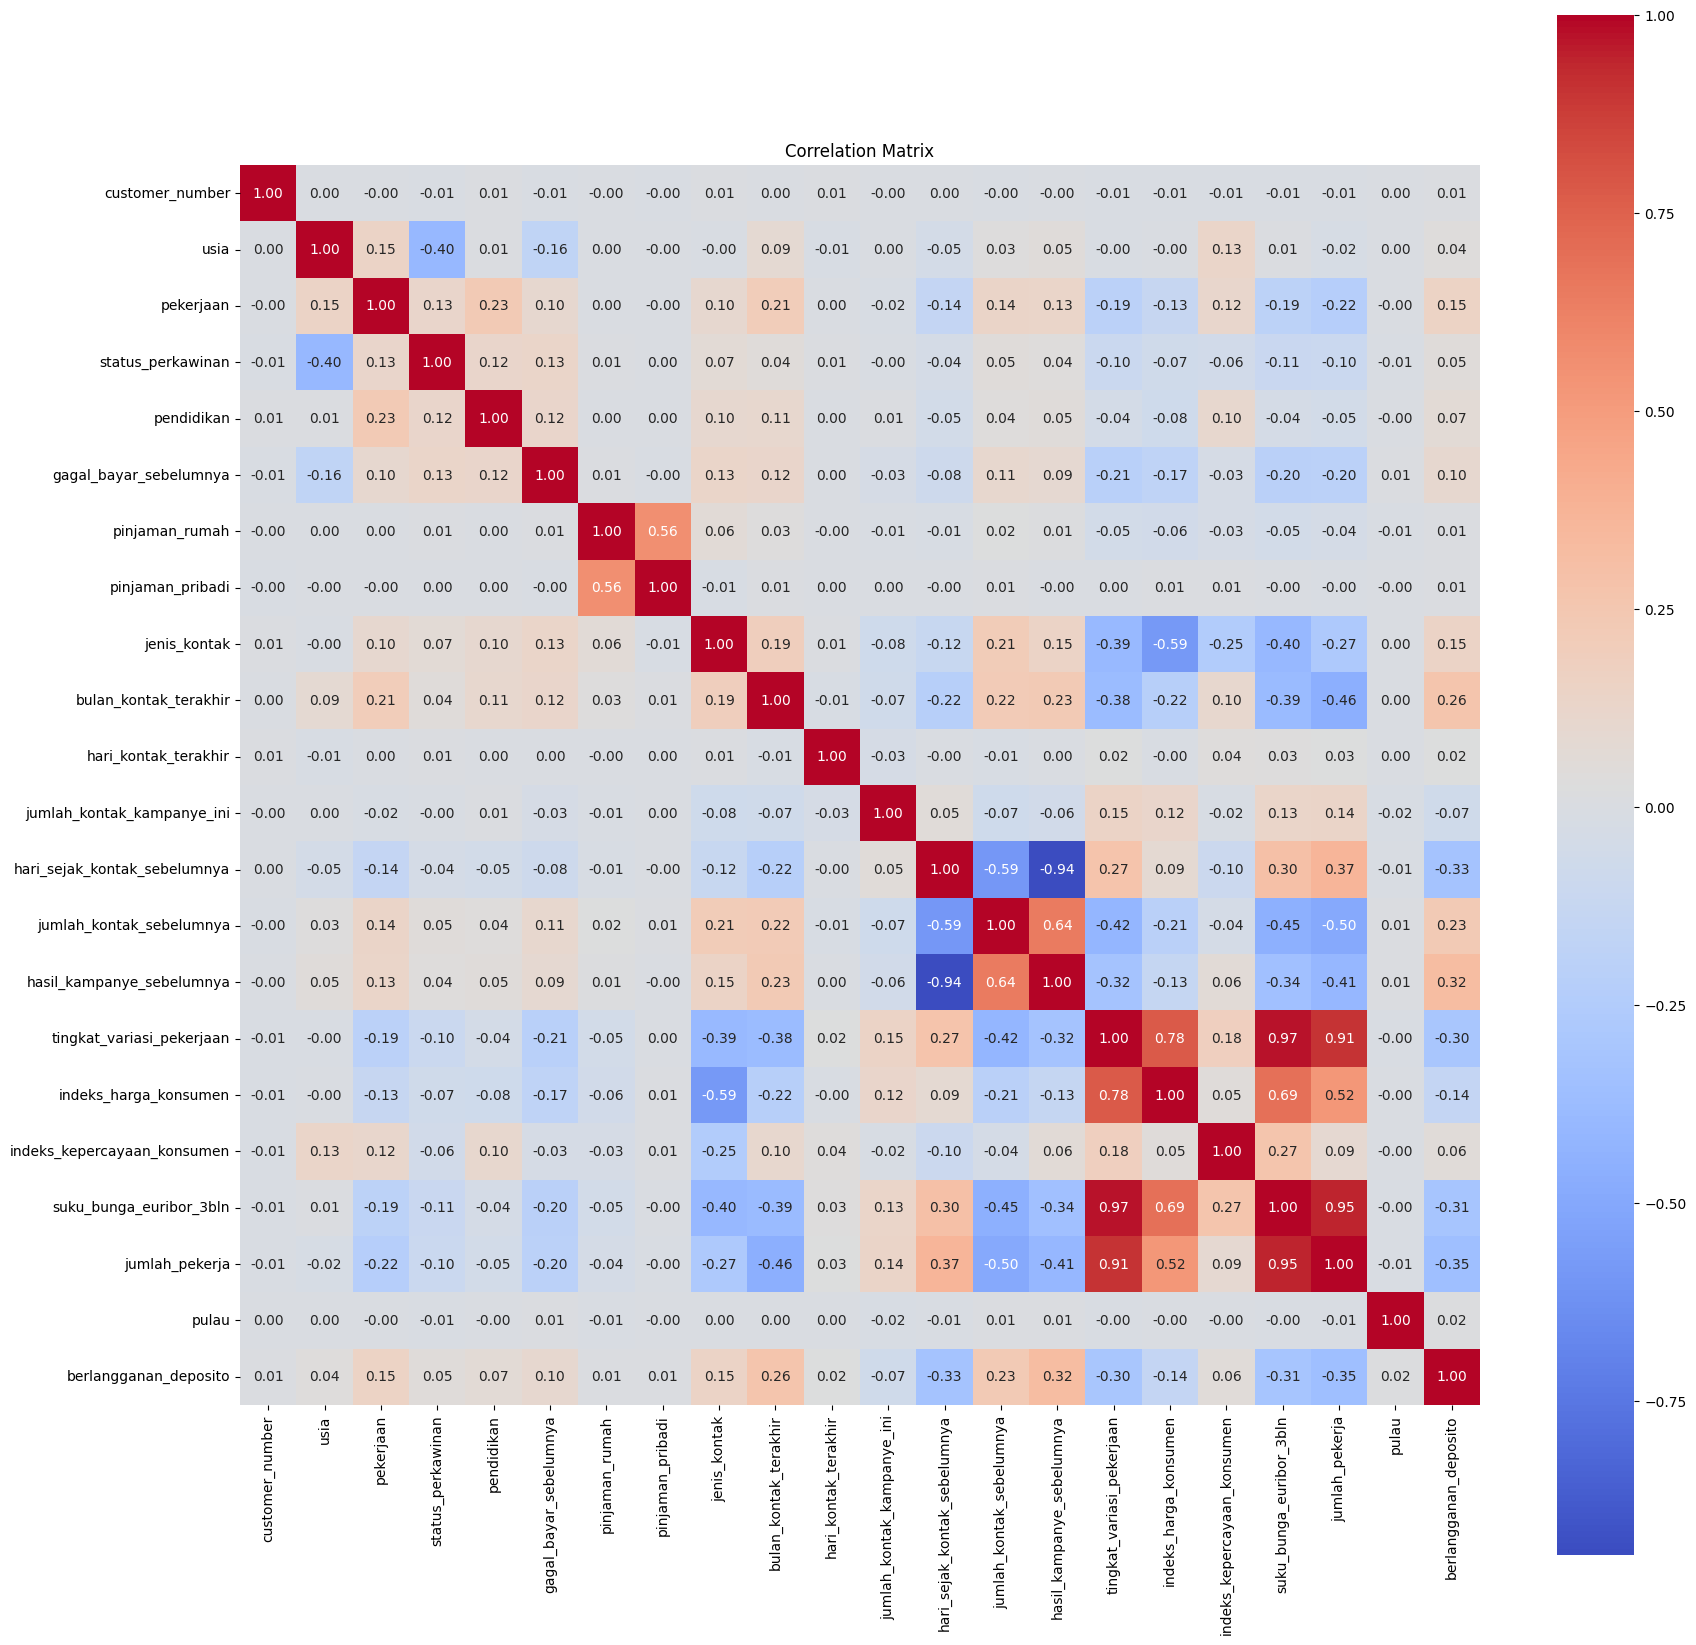

In [ ]:
plot_correlation_matrix(encoded_df)

In [45]:
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# print all categorical columns cramers_v with berlangganan_deposito
def cramers_v_all(df):
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        if col != 'berlangganan_deposito':
            cv = cramers_v(df[col], df['berlangganan_deposito'])
            print(f"Cramér's V between {col} and berlangganan_deposito: {cv:.4f}")
cramers_v_all(df)

Cramér's V between pekerjaan and berlangganan_deposito: 0.1517
Cramér's V between status_perkawinan and berlangganan_deposito: 0.0500
Cramér's V between pendidikan and berlangganan_deposito: 0.0683
Cramér's V between gagal_bayar_sebelumnya and berlangganan_deposito: 0.0994
Cramér's V between pinjaman_rumah and berlangganan_deposito: 0.0105
Cramér's V between pinjaman_pribadi and berlangganan_deposito: 0.0063
Cramér's V between jenis_kontak and berlangganan_deposito: 0.1490
Cramér's V between bulan_kontak_terakhir and berlangganan_deposito: 0.2645
Cramér's V between hari_kontak_terakhir and berlangganan_deposito: 0.0234
Cramér's V between hasil_kampanye_sebelumnya and berlangganan_deposito: 0.3205
Cramér's V between pulau and berlangganan_deposito: 0.0167


C:\Users\farel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\farel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\farel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  war

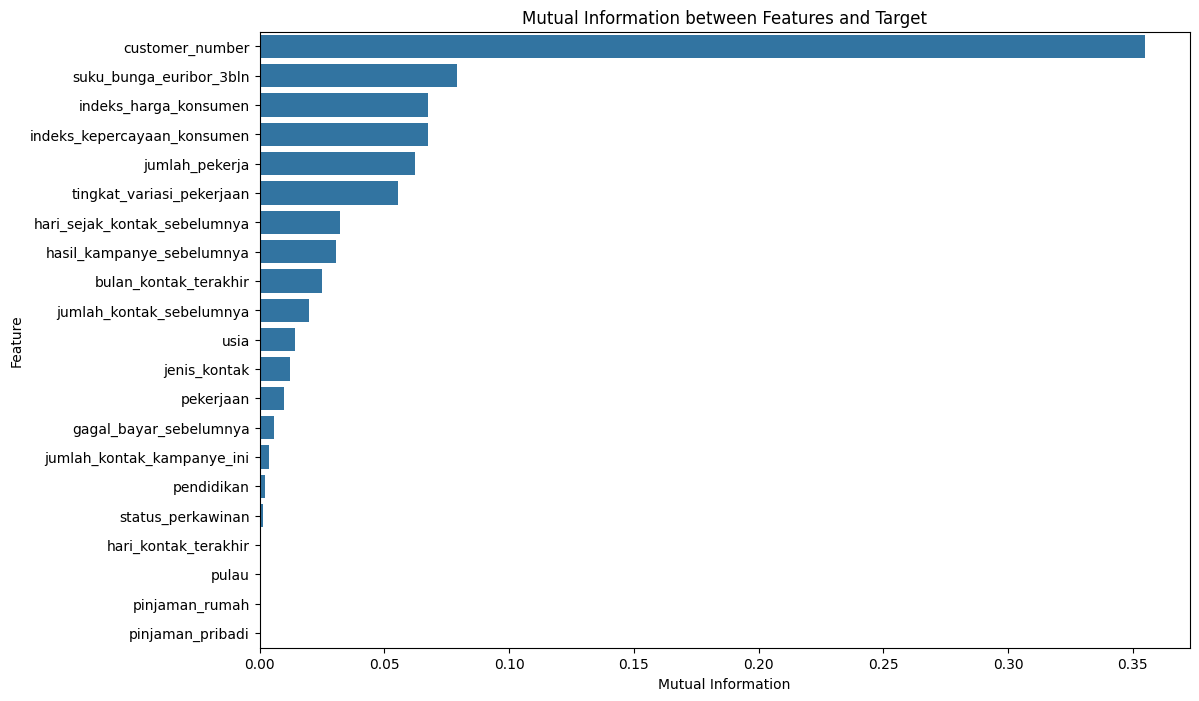

In [43]:
plot_mutual_info(encoded_df)

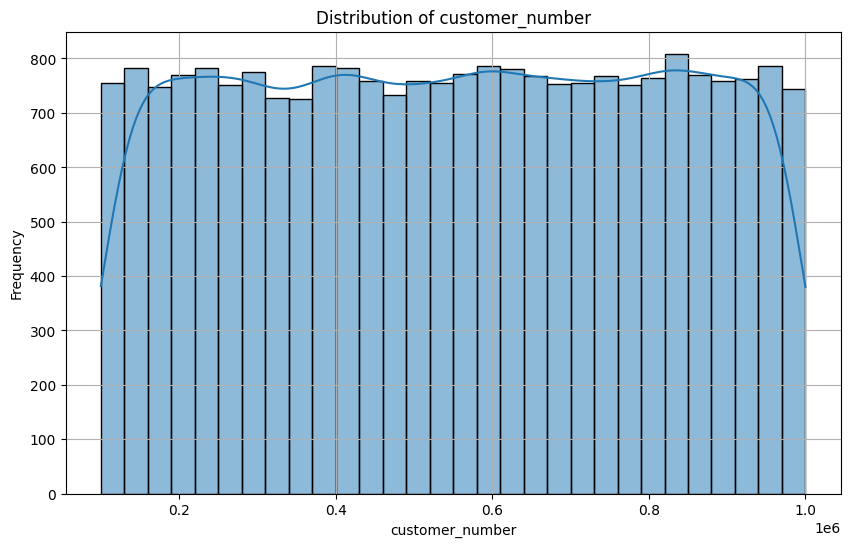

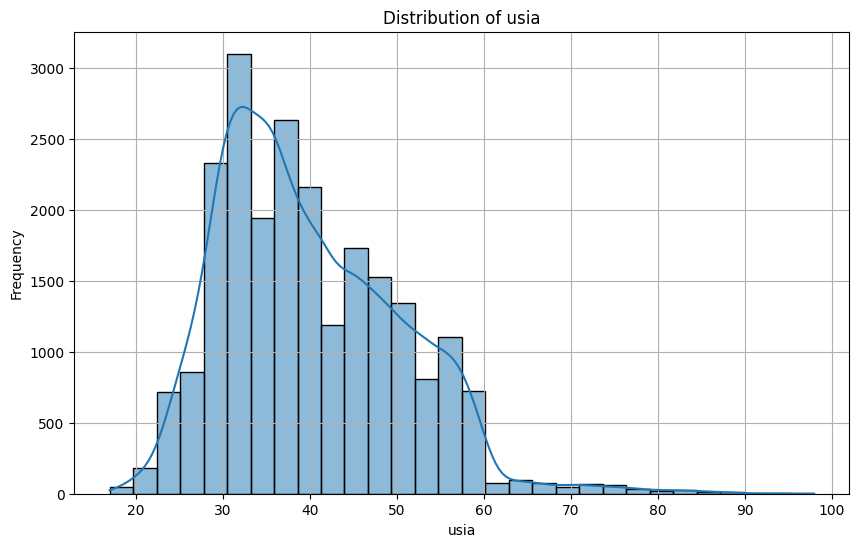

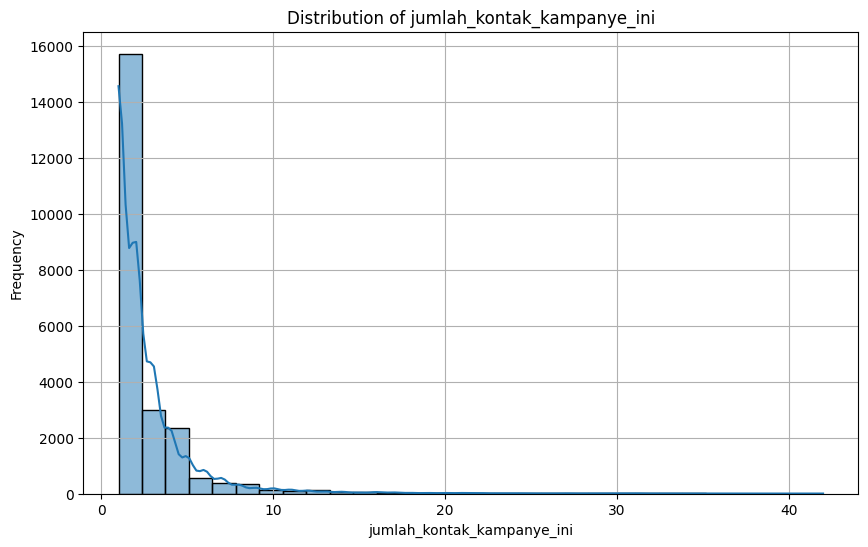

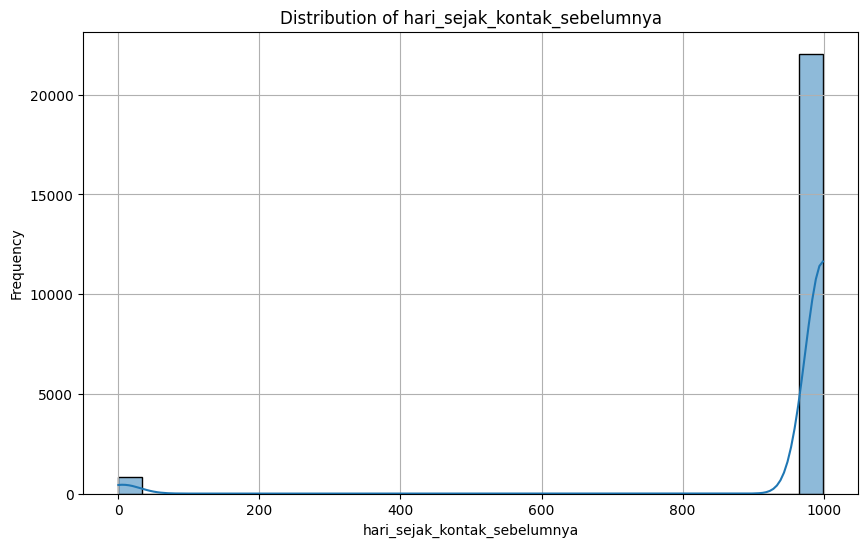

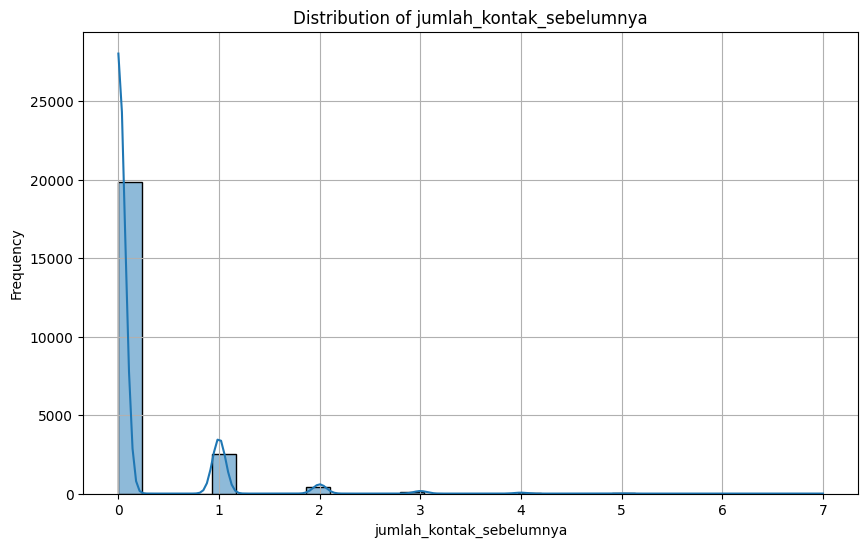

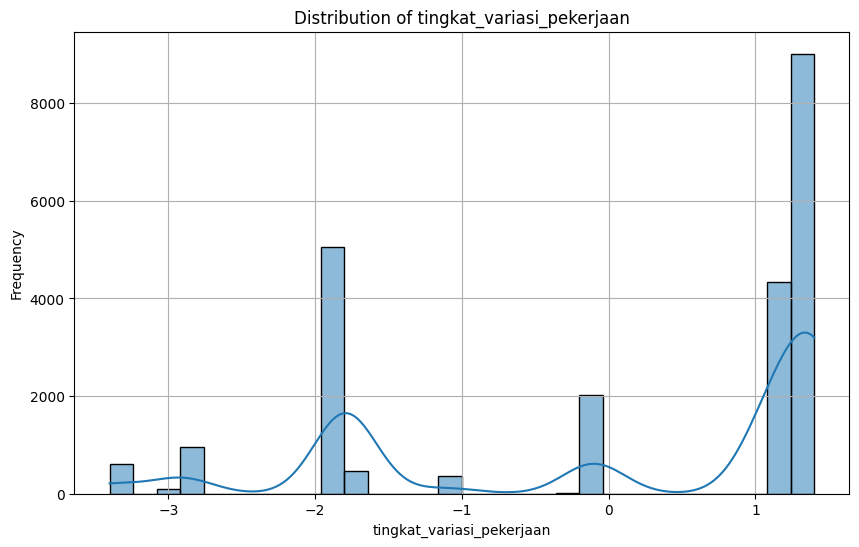

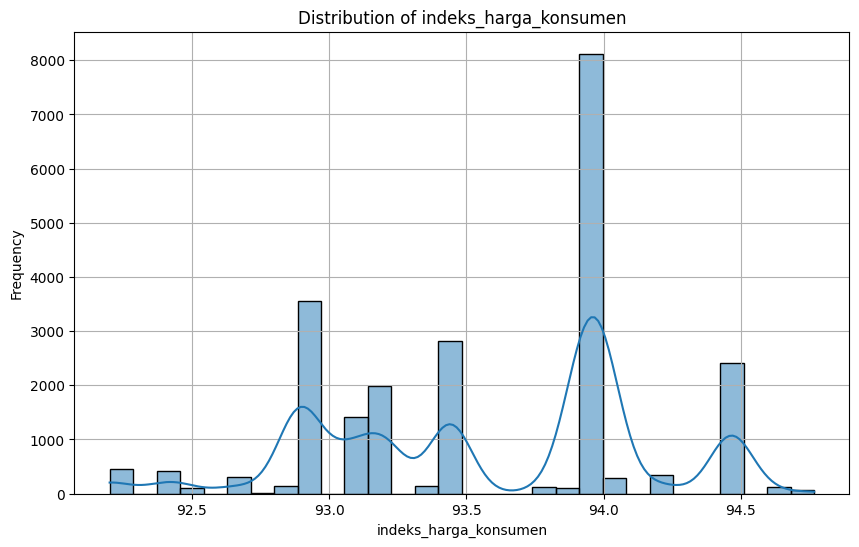

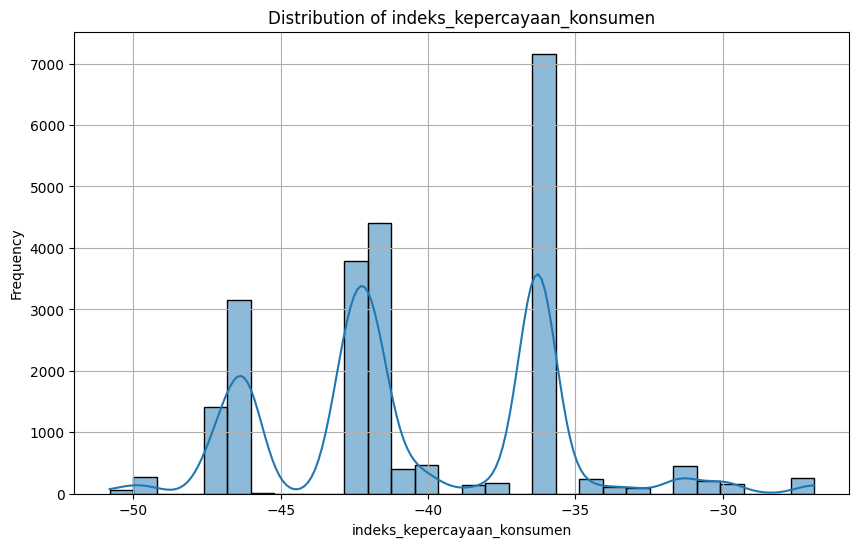

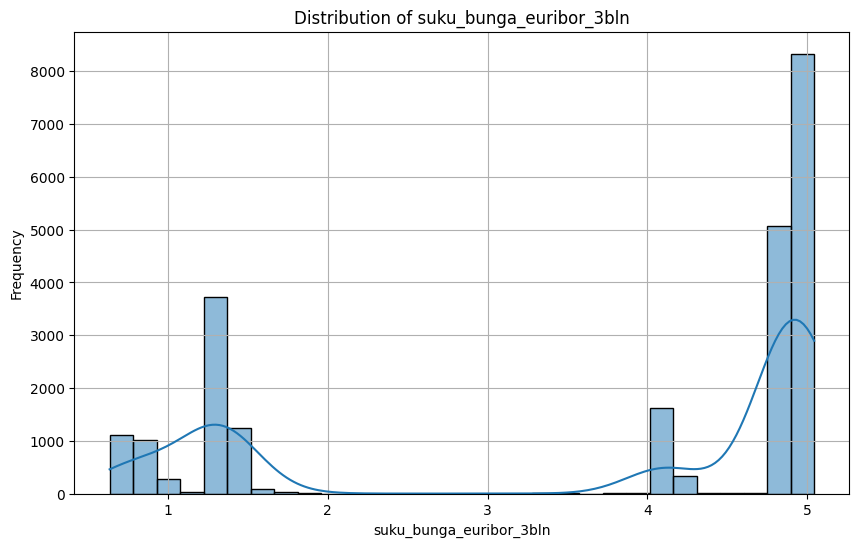

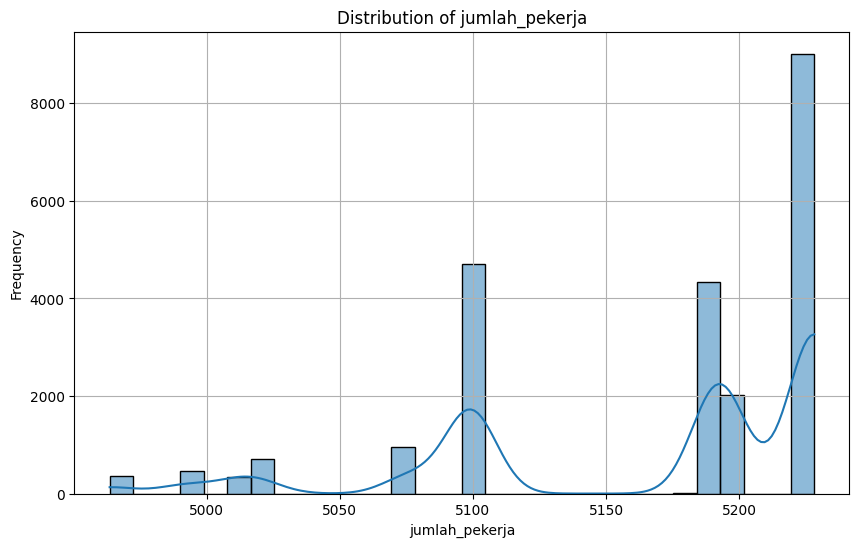

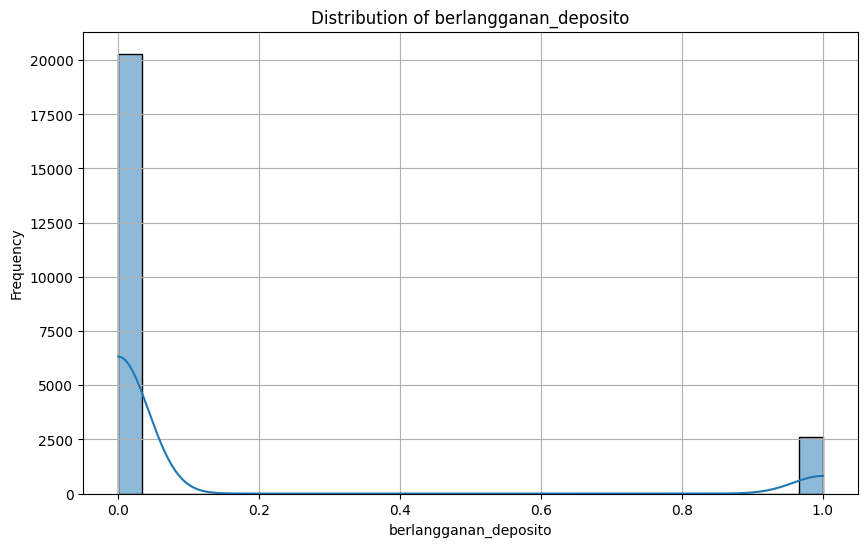

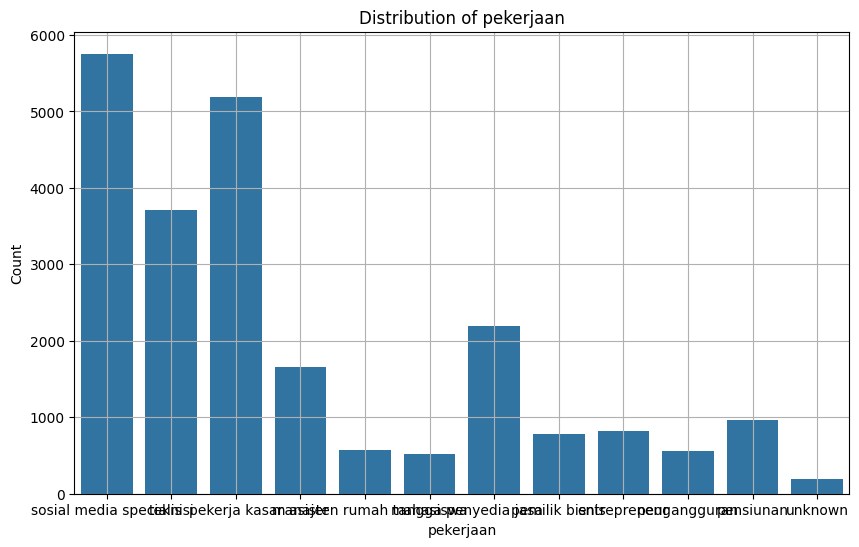

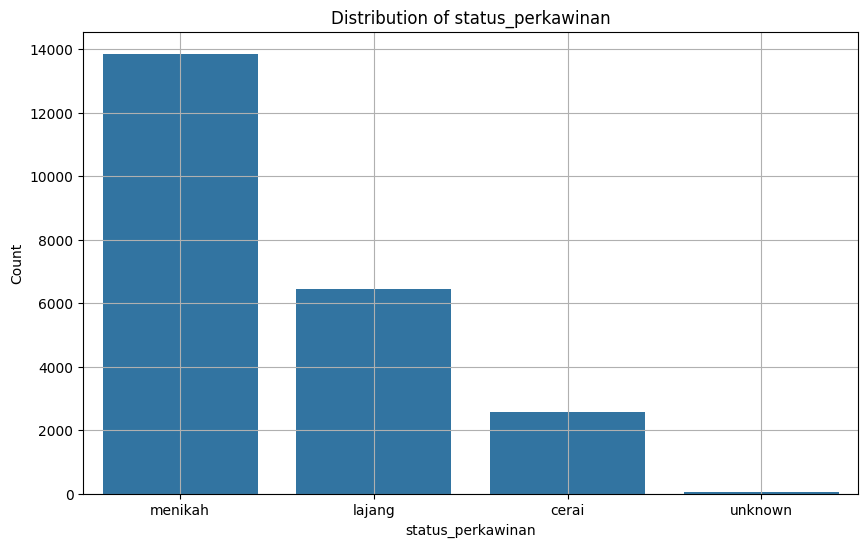

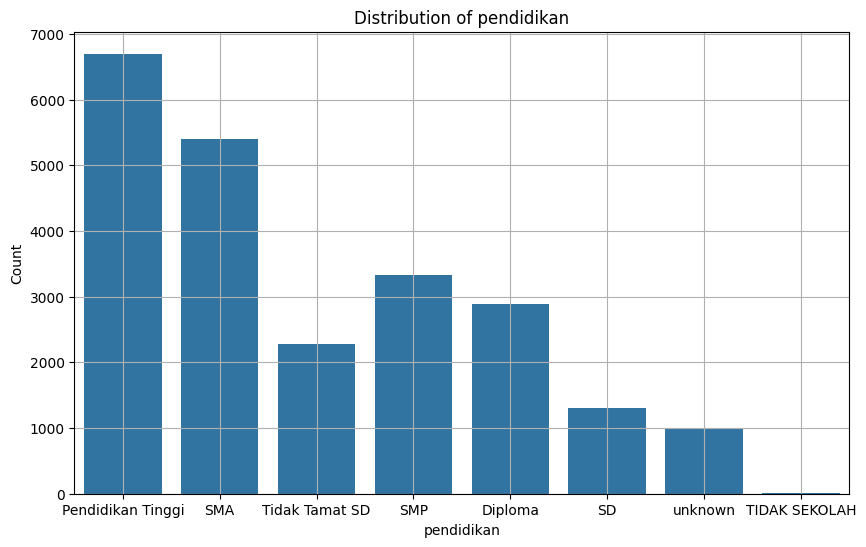

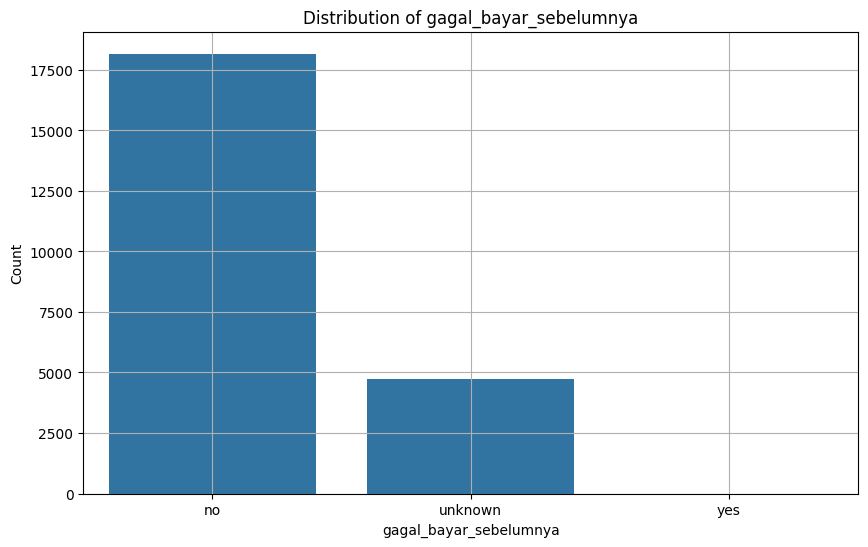

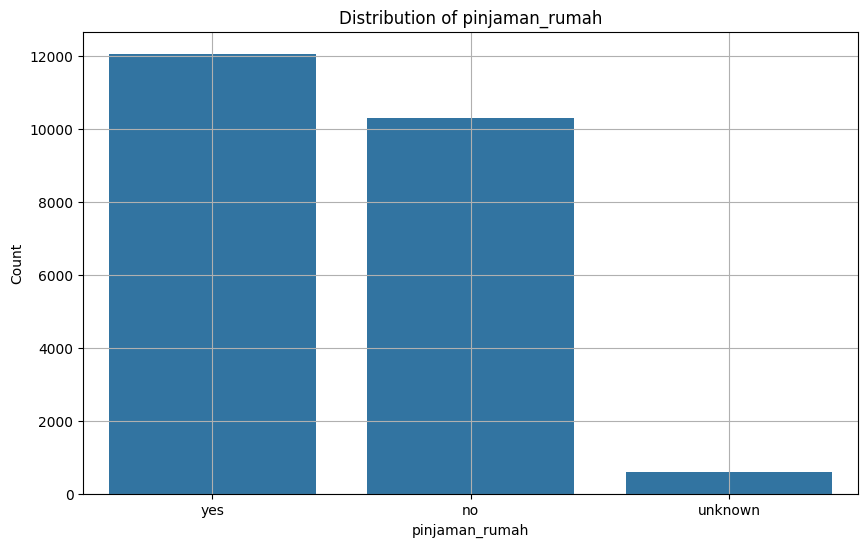

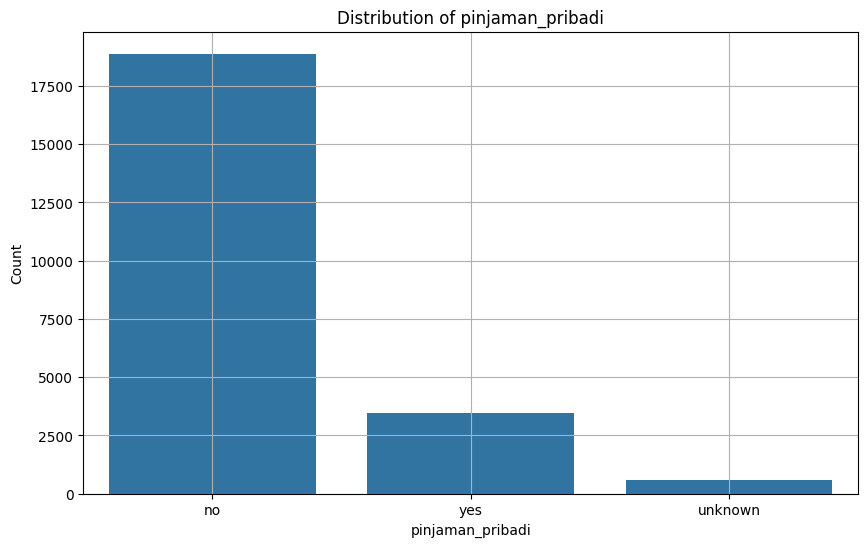

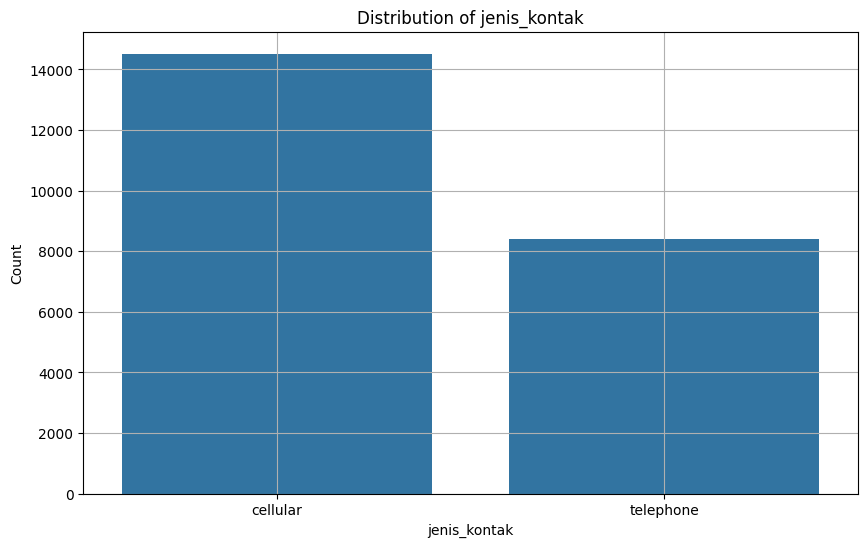

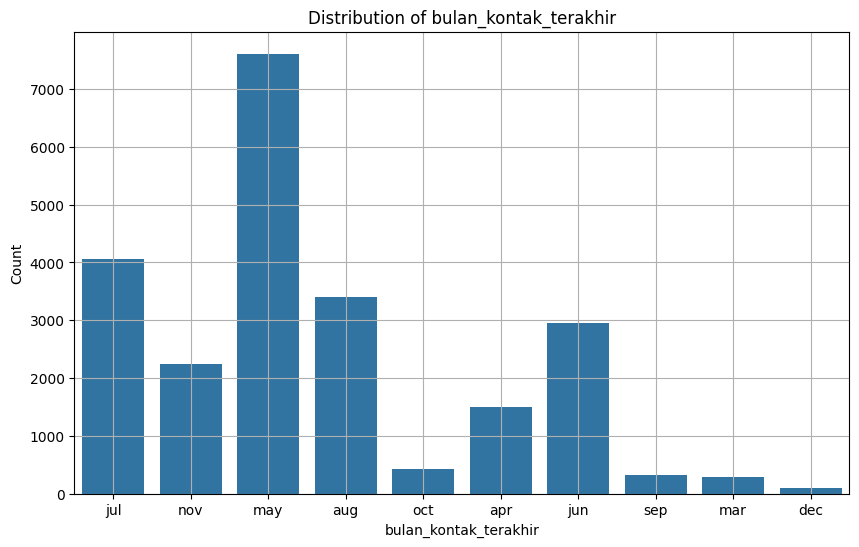

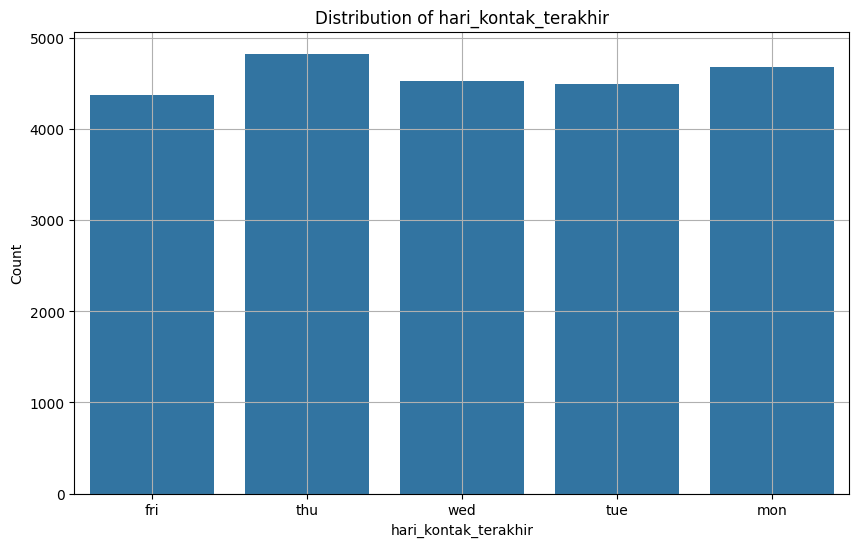

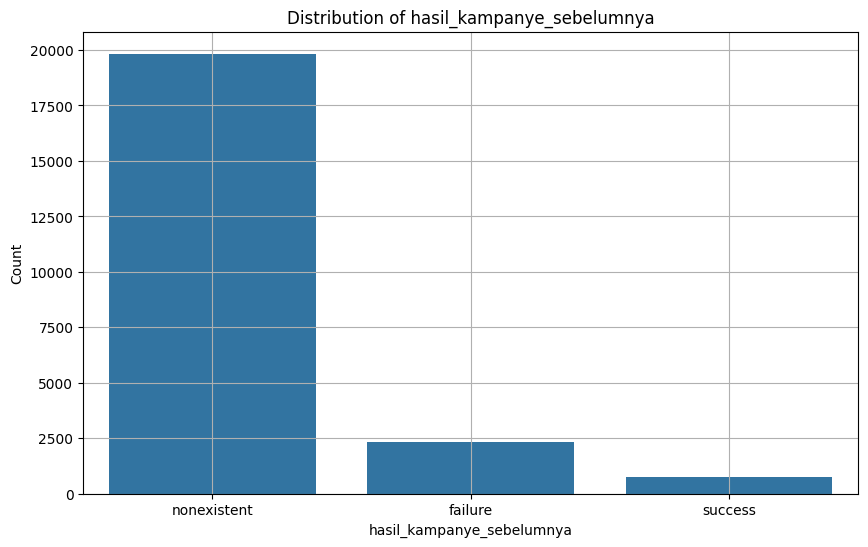

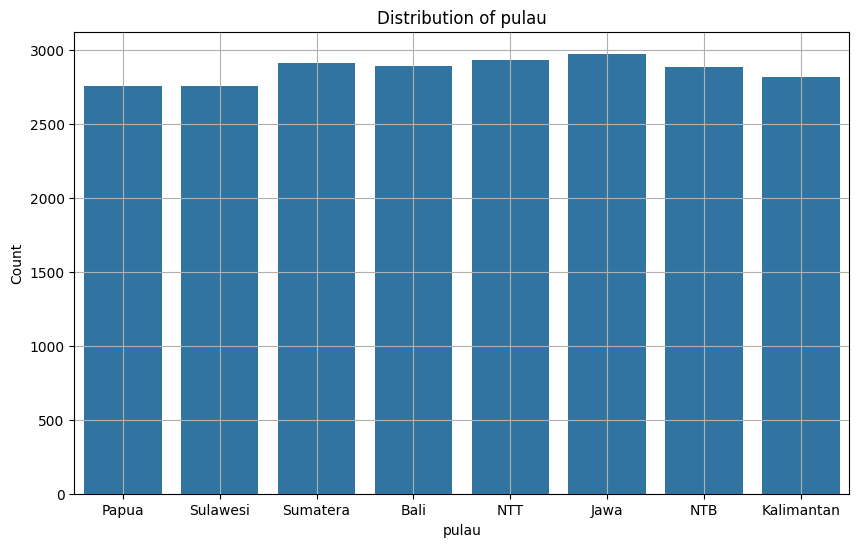

In [4]:
plot_all_features(df)

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


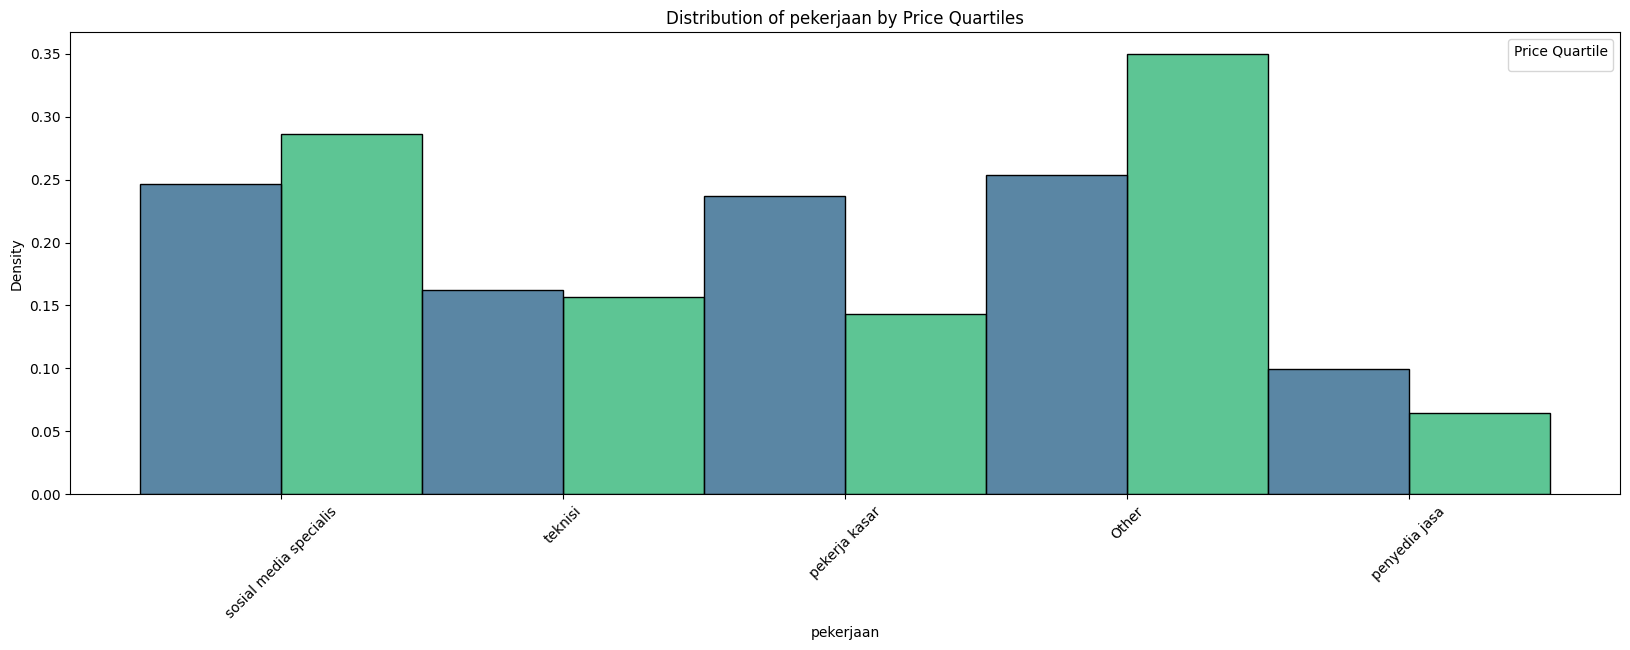

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


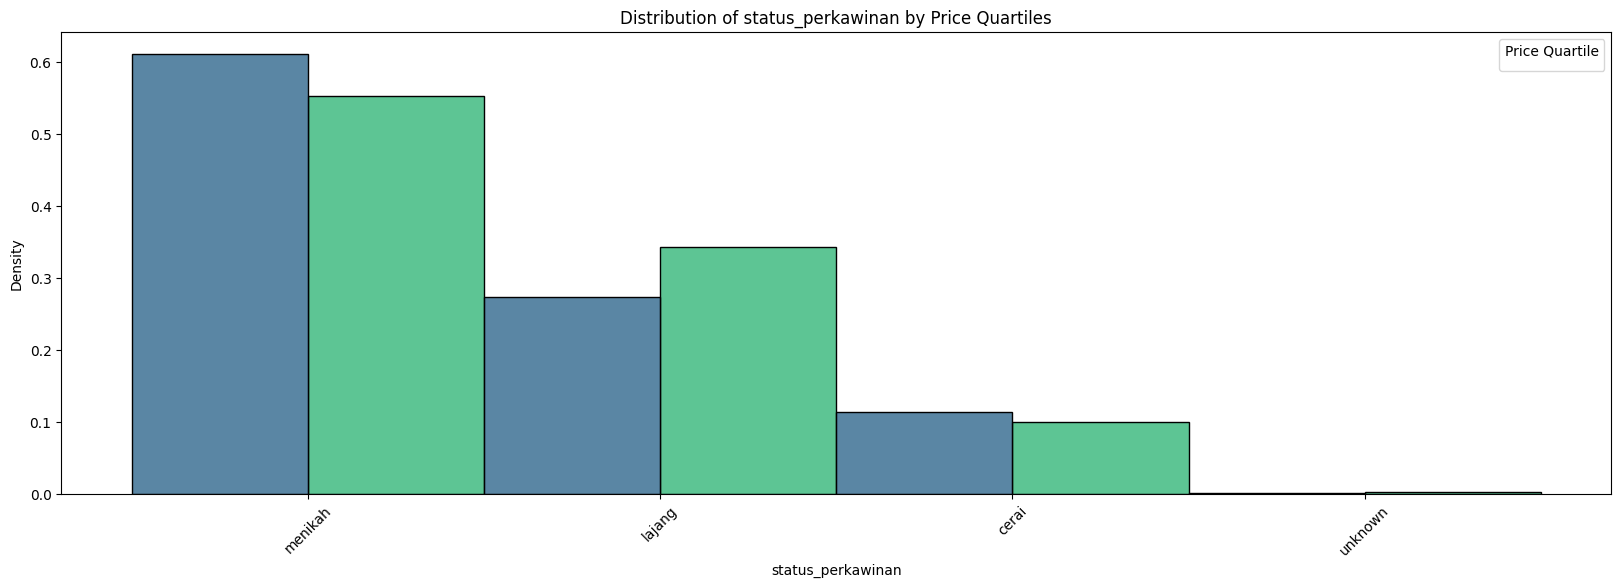

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


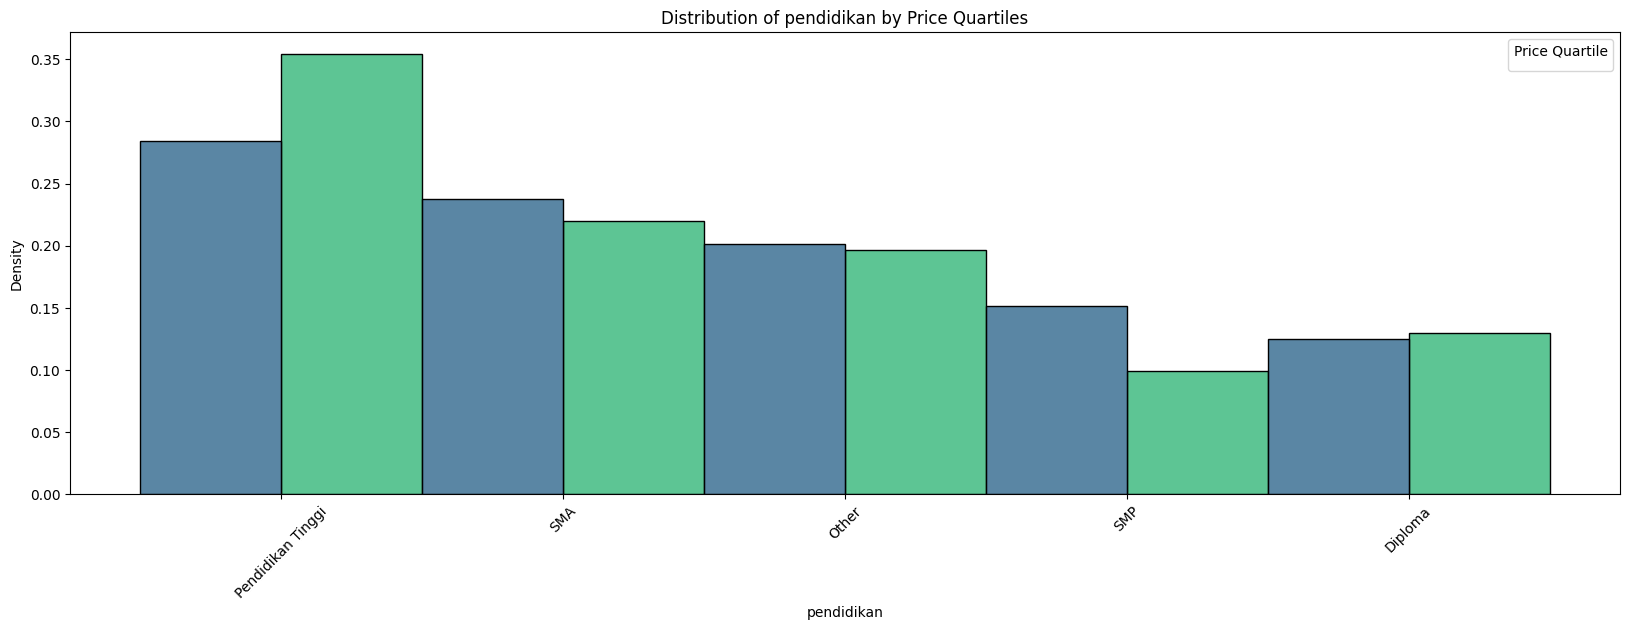

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


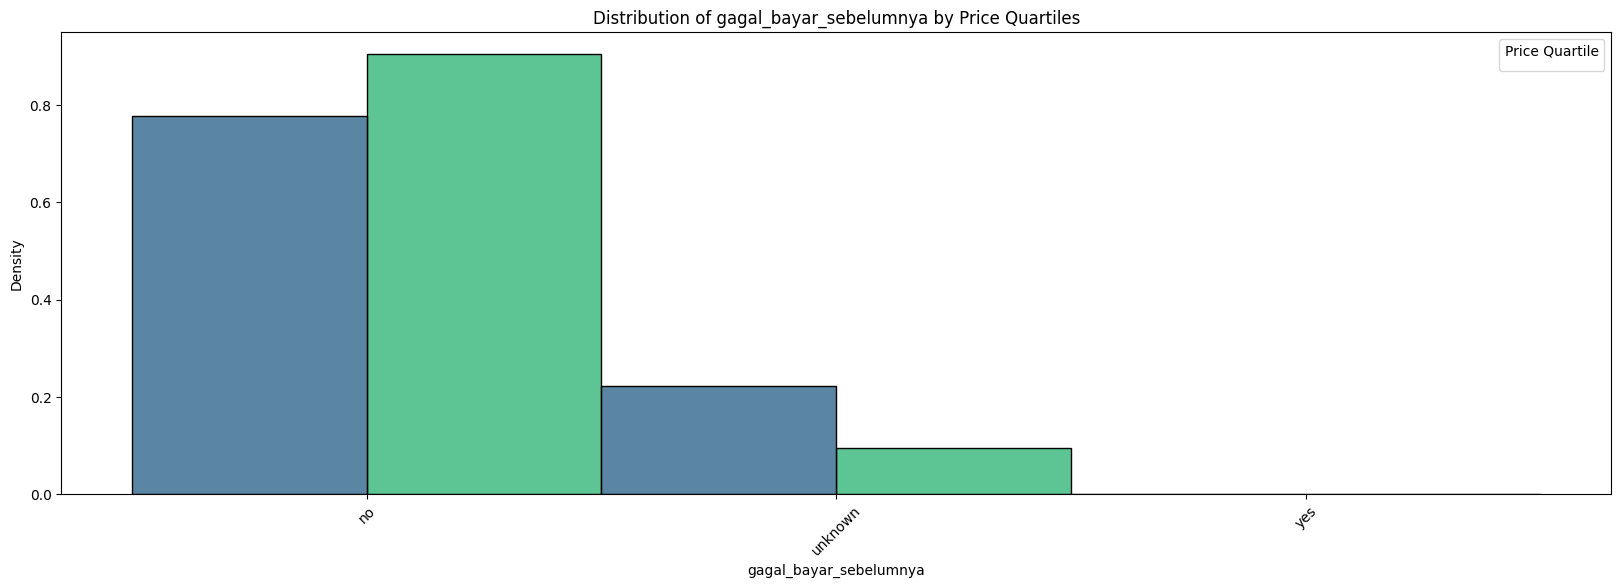

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


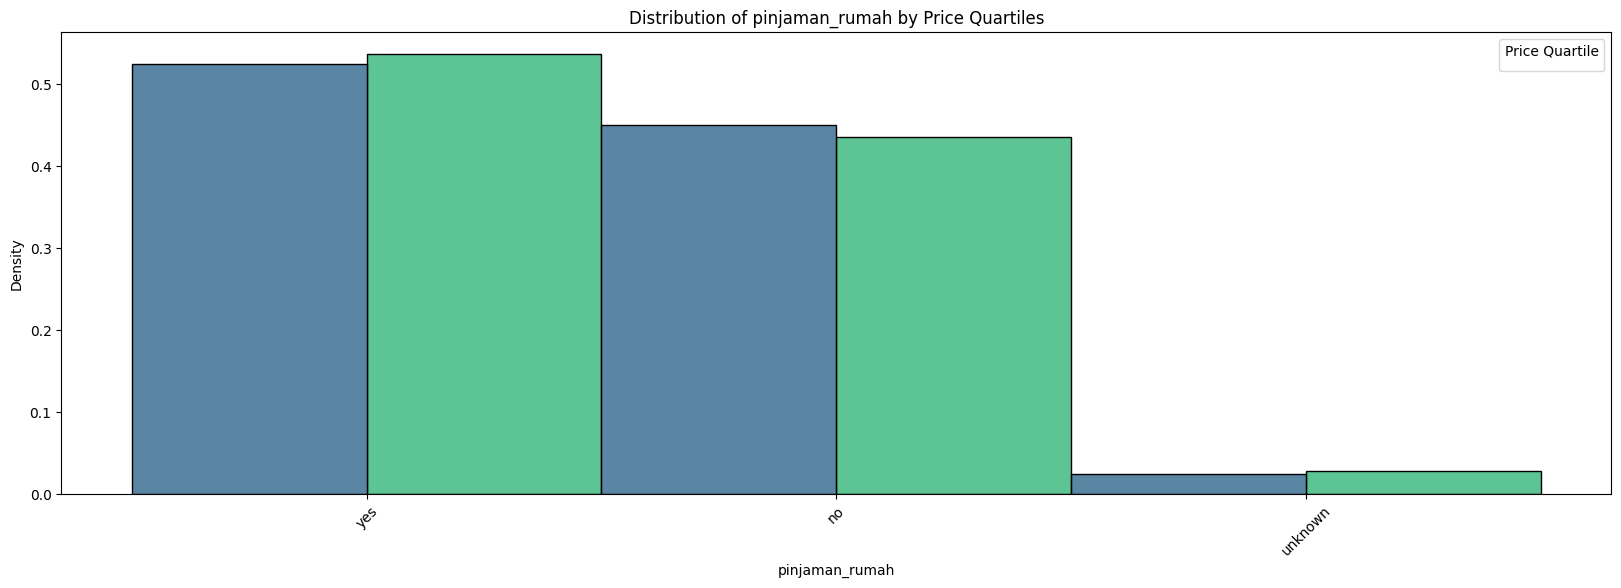

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


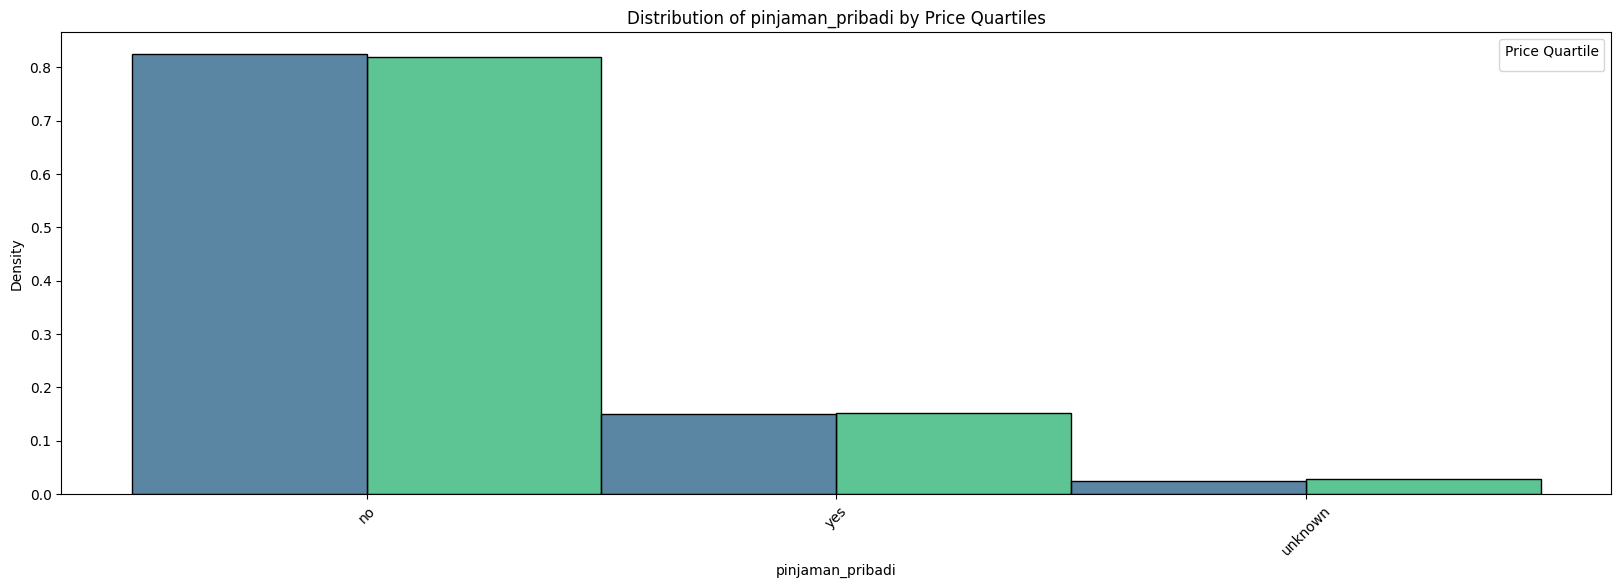

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


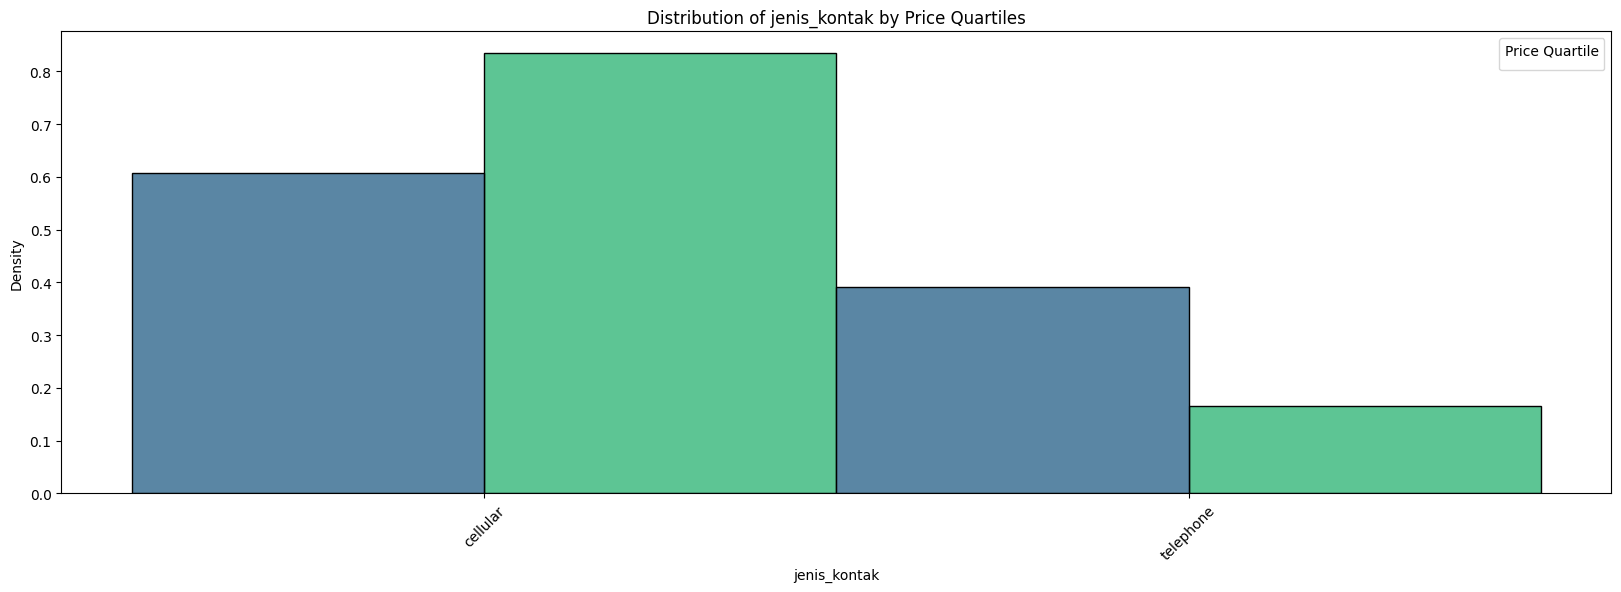

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


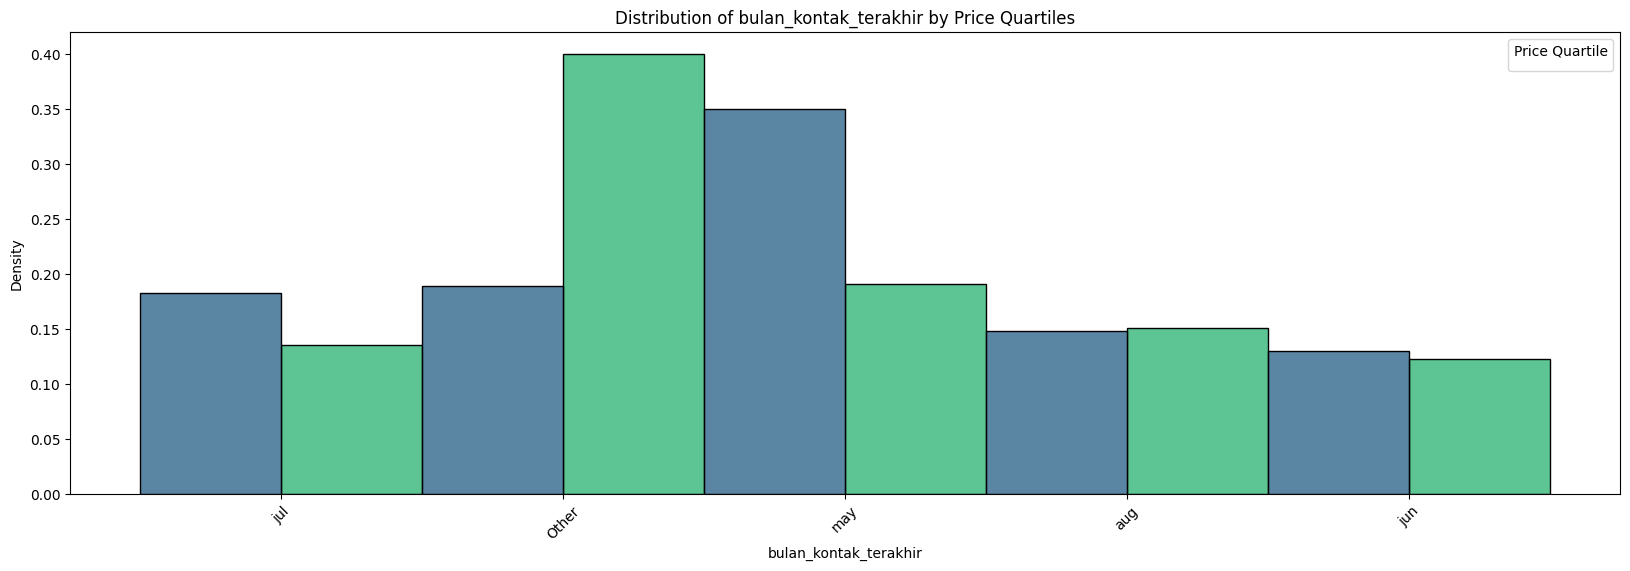

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


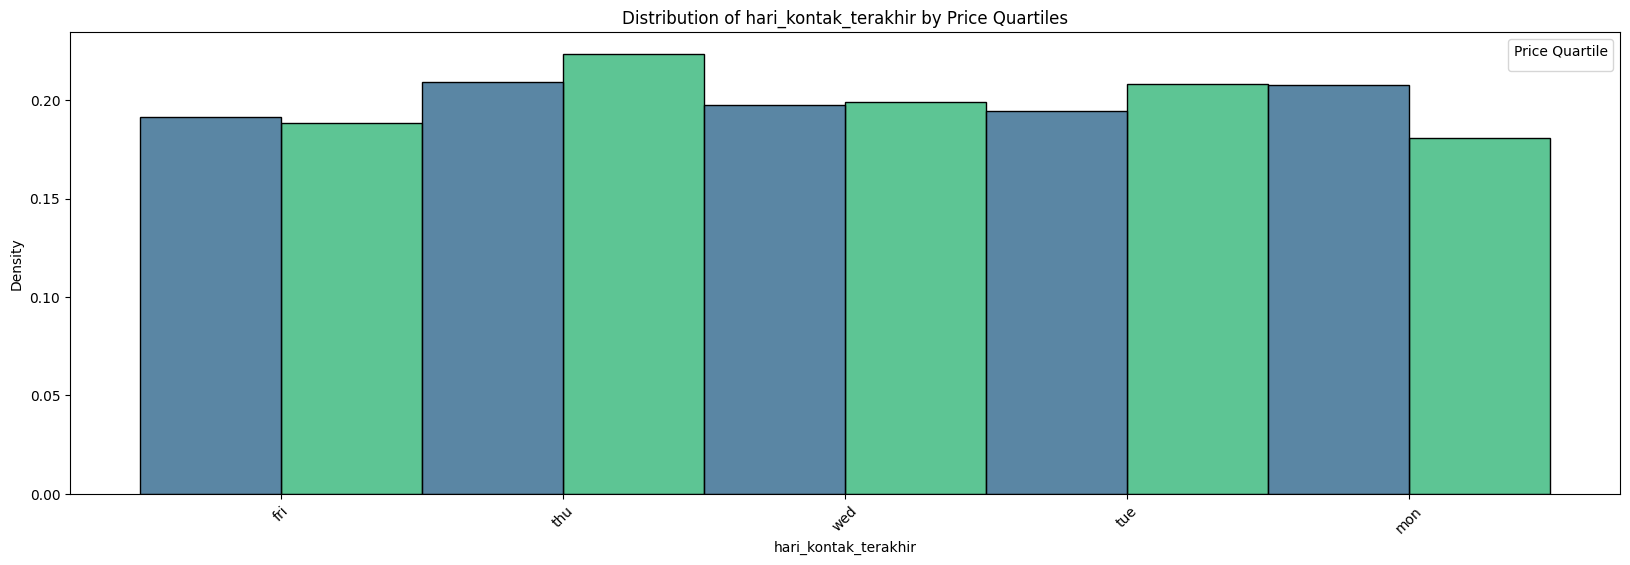

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


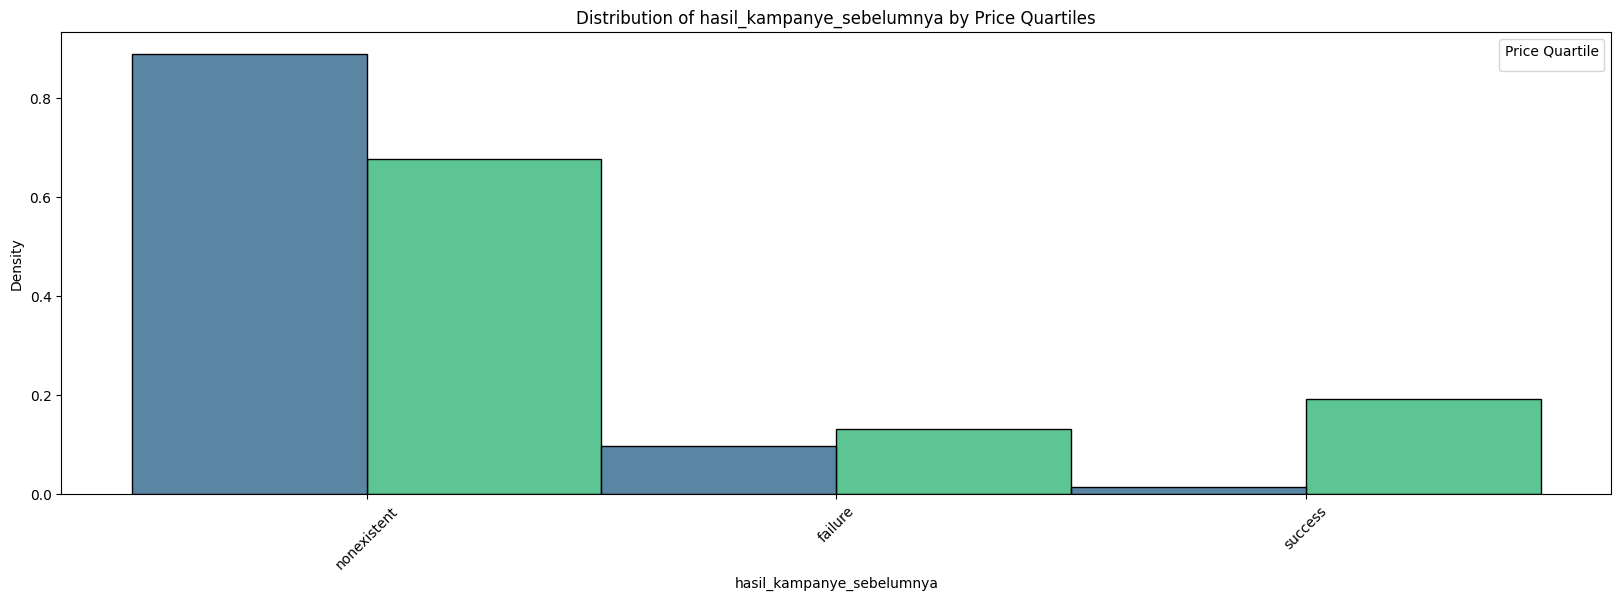

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\1091572457.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Price Quartile')


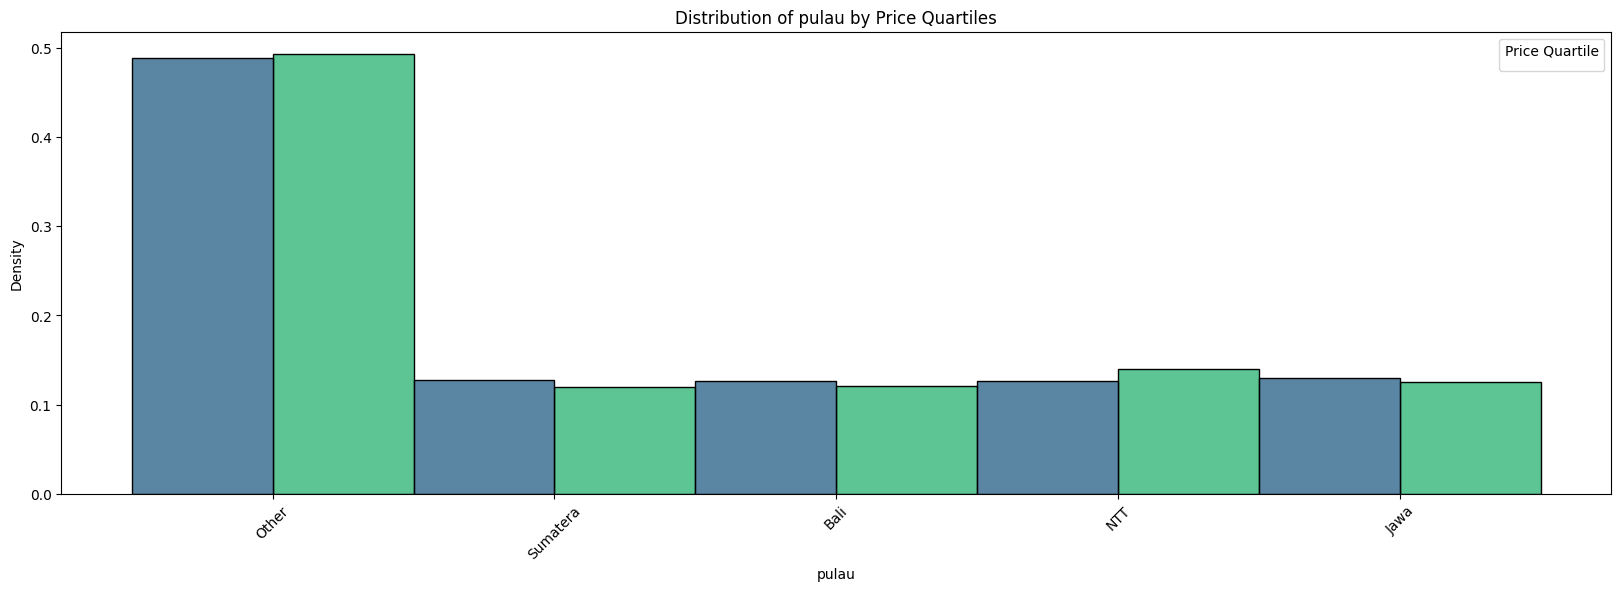

In [31]:
plot_categorical_features(df)

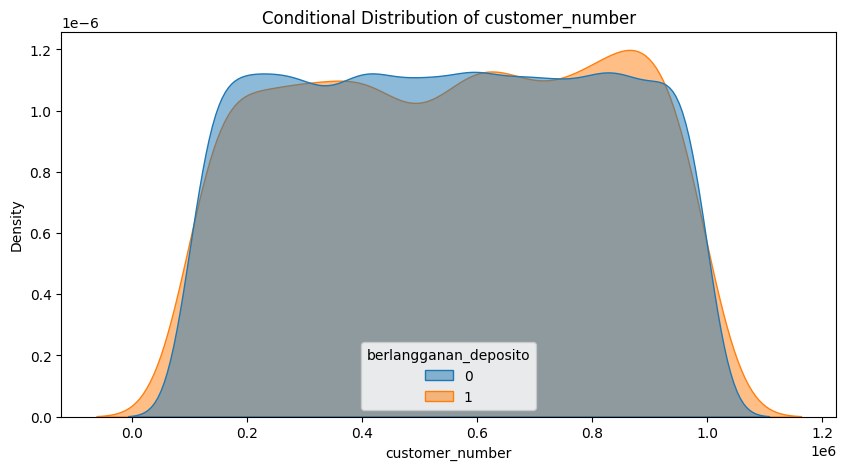

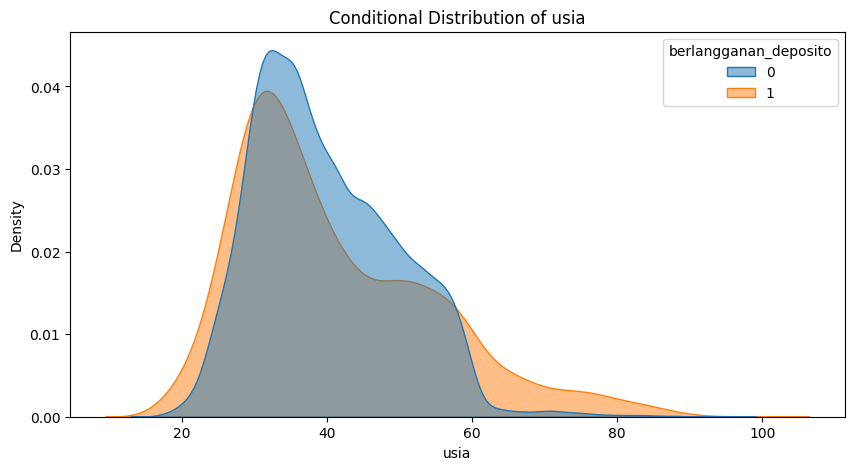

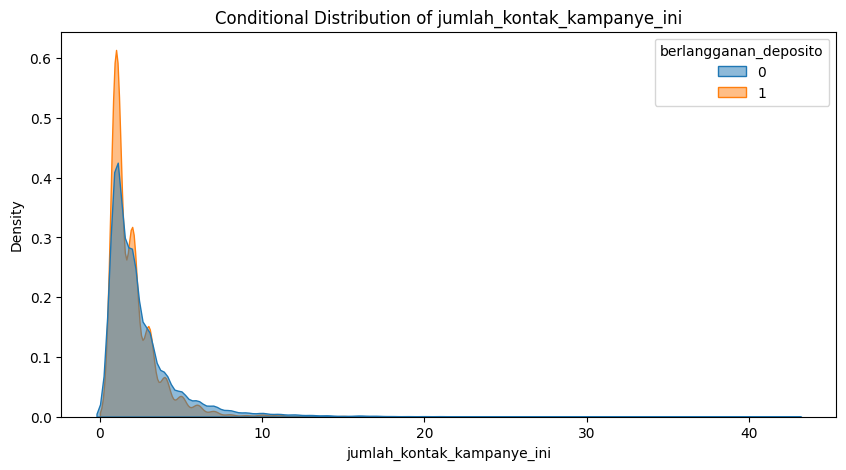

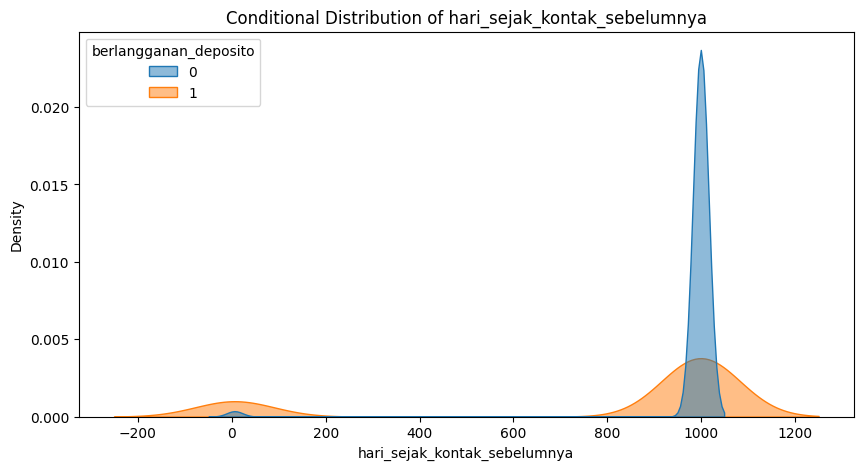

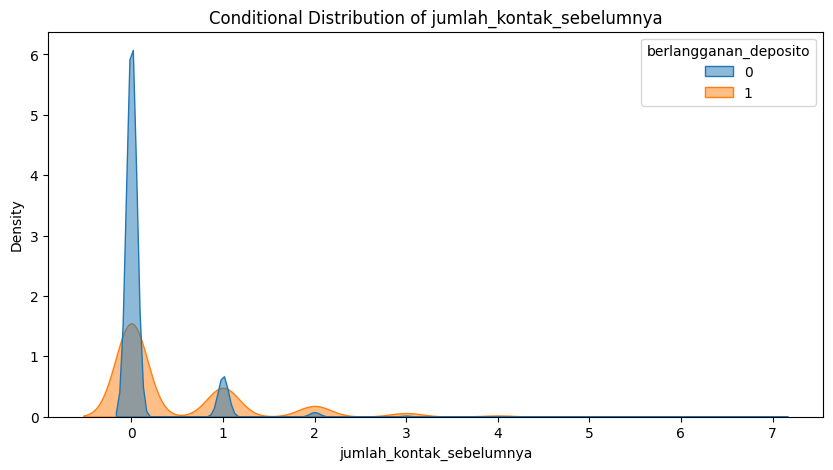

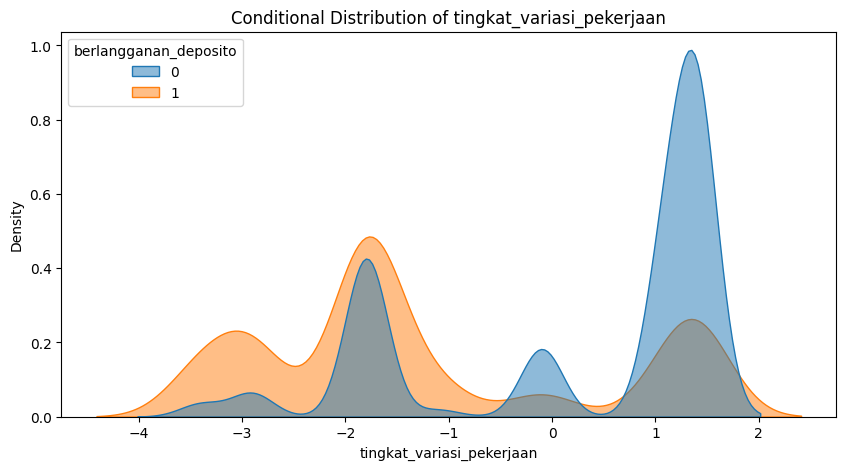

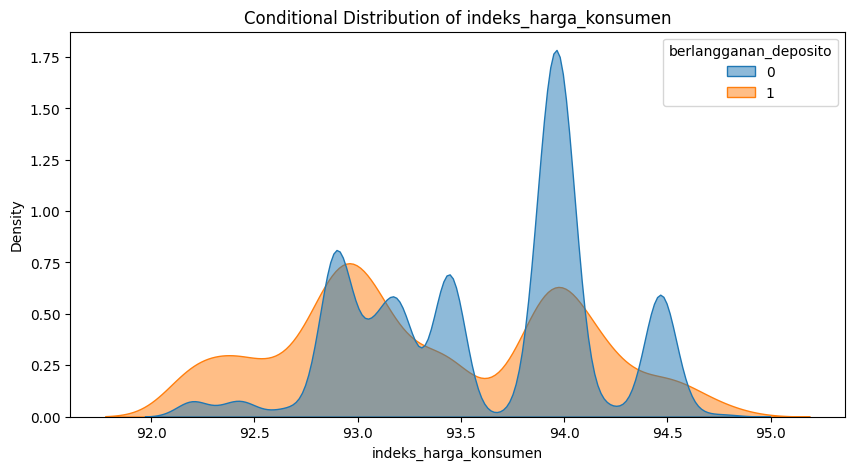

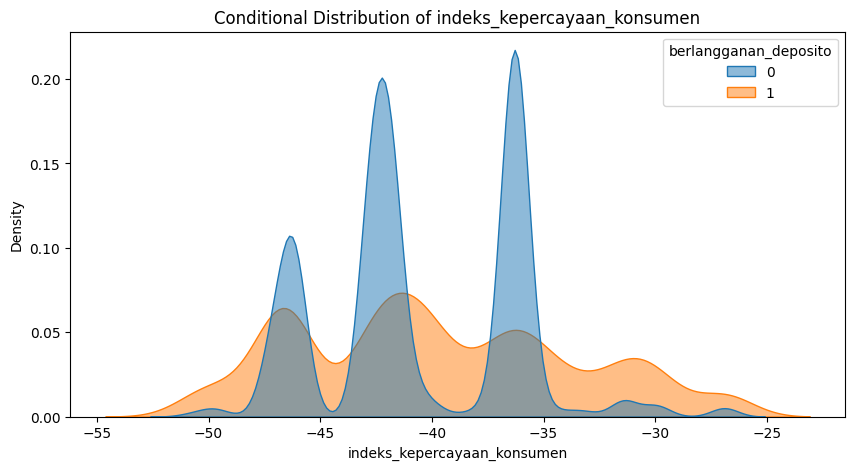

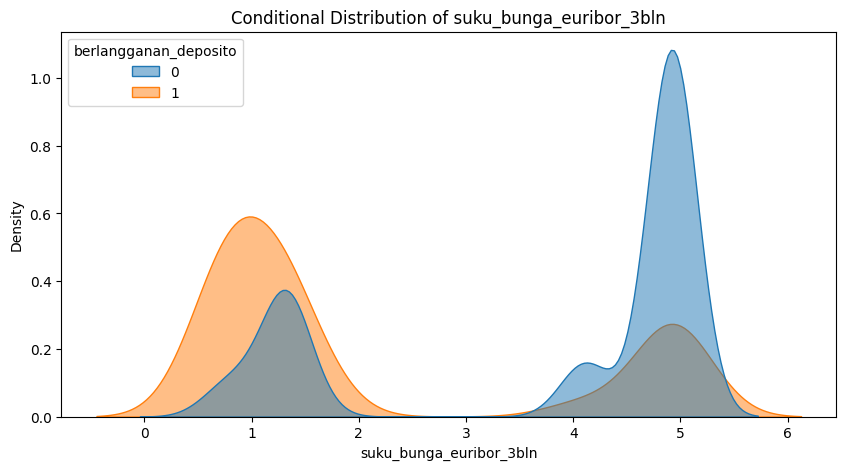

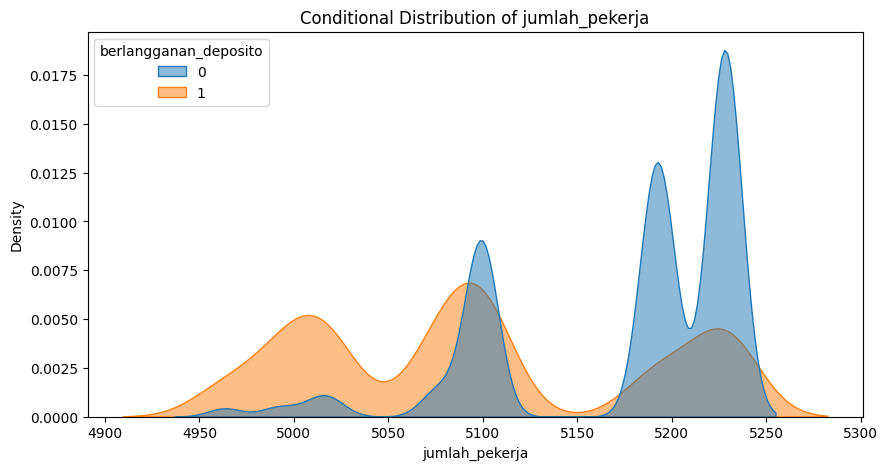

C:\Users\farel\AppData\Local\Temp\ipykernel_31340\3030212757.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=df['berlangganan_deposito'], common_norm=False, fill=True, alpha=0.5)


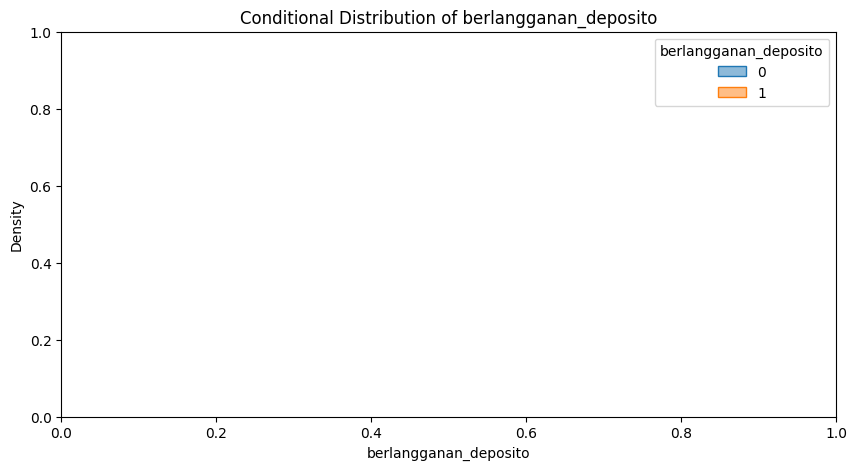

In [34]:
plot_numerical_features(df)

In [1]:
def categorical_correlation(column: str) -> None:
    ret = df.copy()
    genre_dummies = pd.get_dummies(ret[column])

    combined = pd.concat([genre_dummies, ret["berlangganan_deposito"]], axis=1)

    corr_matrix = combined.corr()

    coppa_corr = corr_matrix[["berlangganan_deposito"]].drop(index="berlangganan_deposito")

    coppa_corr = coppa_corr.sort_values(by="berlangganan_deposito", ascending=False)

    plt.figure(figsize=(10, len(coppa_corr) * 0.5 + 1))
    sns.heatmap(coppa_corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.tight_layout()
    plt.show()


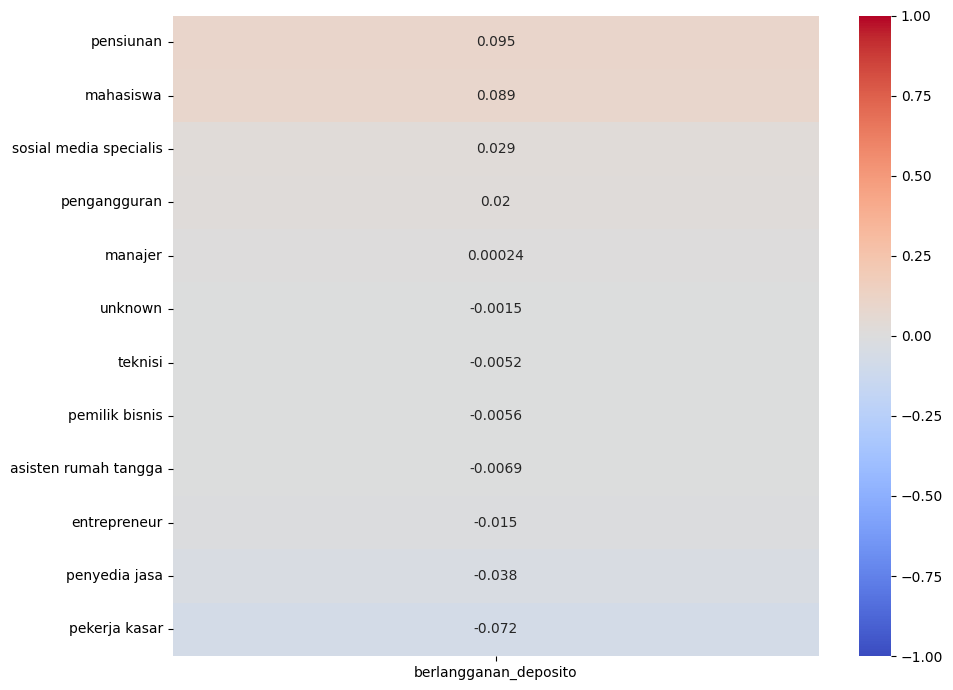

In [5]:
categorical_correlation("pekerjaan")

pekerjaan
status_perkawinan
pendidikan
gagal_bayar_sebelumnya
pinjaman_rumah
pinjaman_pribadi
jenis_kontak
bulan_kontak_terakhir
hari_kontak_terakhir
hasil_kampanye_sebelumnya
pulau

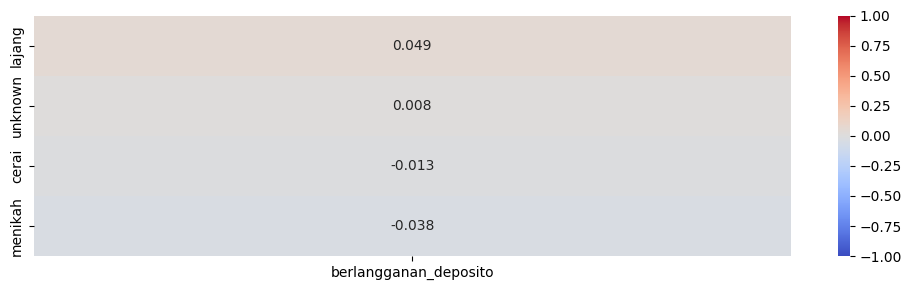

In [7]:
categorical_correlation("status_perkawinan")

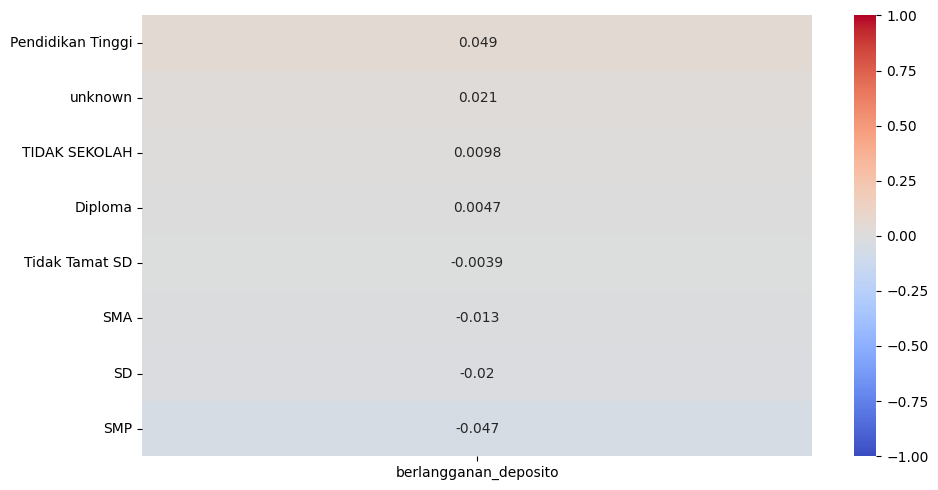

In [8]:
categorical_correlation("pendidikan")

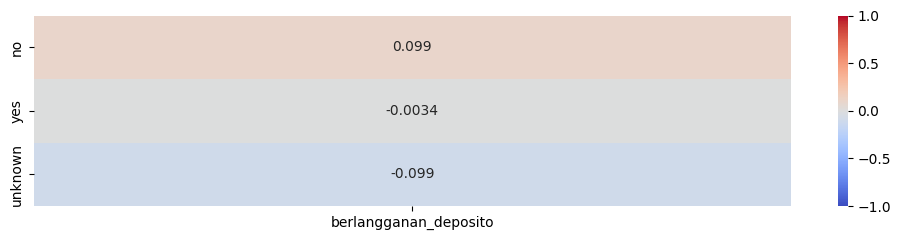

In [9]:
categorical_correlation("gagal_bayar_sebelumnya")

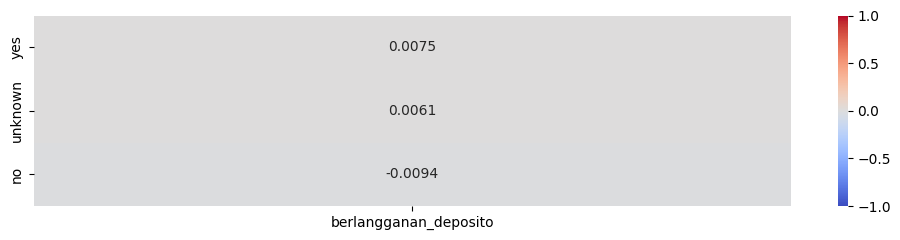

In [10]:
categorical_correlation("pinjaman_rumah")

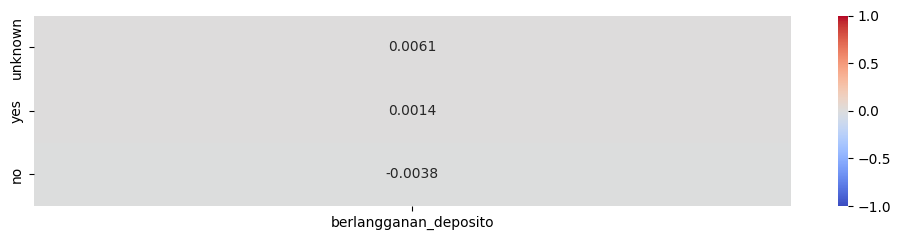

In [11]:
categorical_correlation("pinjaman_pribadi")

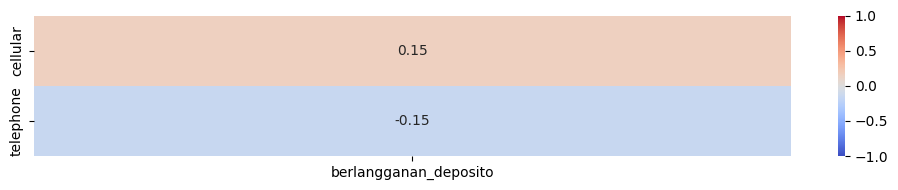

In [12]:
categorical_correlation("jenis_kontak")

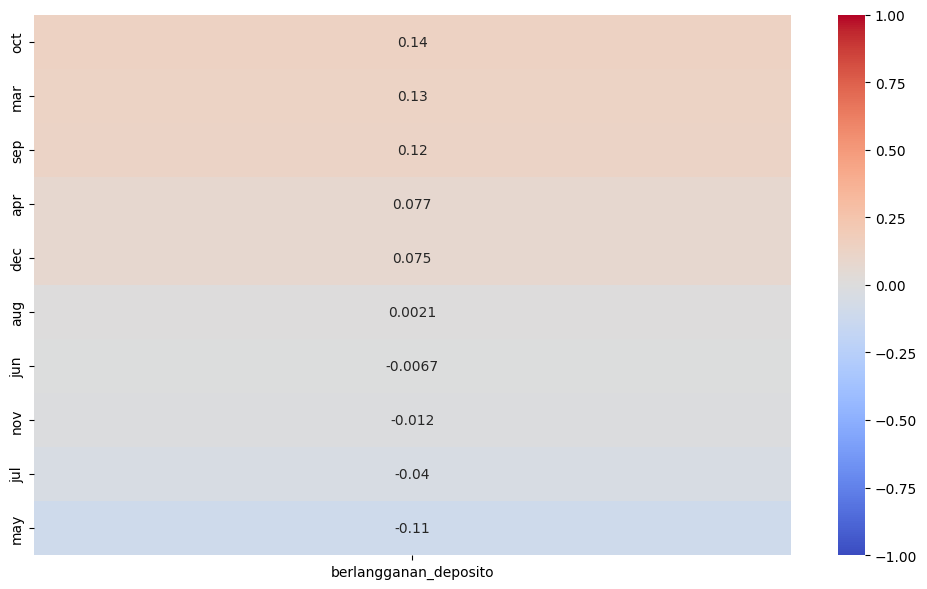

In [13]:
categorical_correlation("bulan_kontak_terakhir")

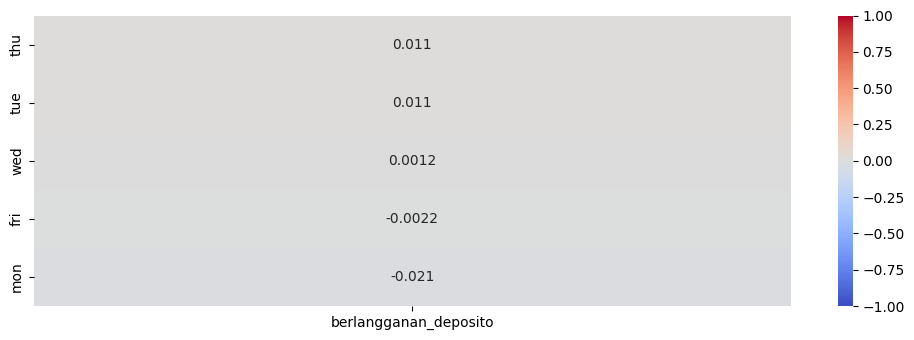

In [14]:
categorical_correlation("hari_kontak_terakhir")

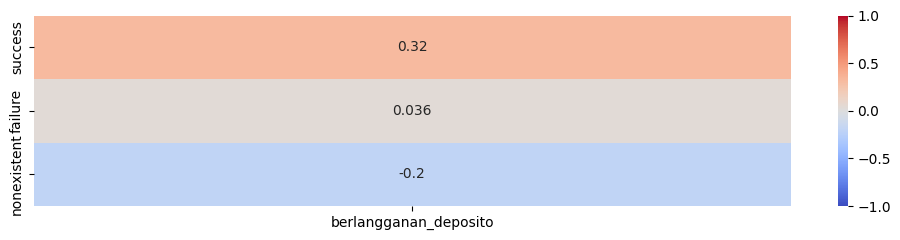

In [15]:
categorical_correlation("hasil_kampanye_sebelumnya")

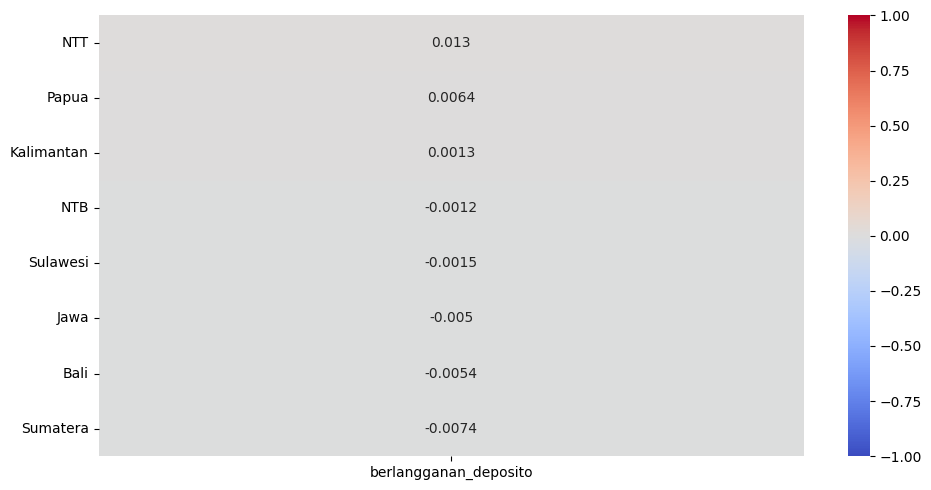

In [16]:
categorical_correlation("pulau")

## Boxplot

customer_number
usia
jumlah_kontak_kampanye_ini
hari_sejak_kontak_sebelumnya
jumlah_kontak_sebelumnya
tingkat_variasi_pekerjaan
indeks_harga_konsumen
indeks_kepercayaan_konsumen
suku_bunga_euribor_3bln
jumlah_pekerja
berlangganan_deposito

In [7]:
def boxplot(col):
    sns.boxplot(data=df, x="berlangganan_deposito", y=col)
    plt.title(f"Boxplot of {col} by berlangganan_deposito")
    plt.xlabel("berlangganan_deposito")
    plt.ylabel(f"{col}")
    plt.tight_layout()
    plt.show()

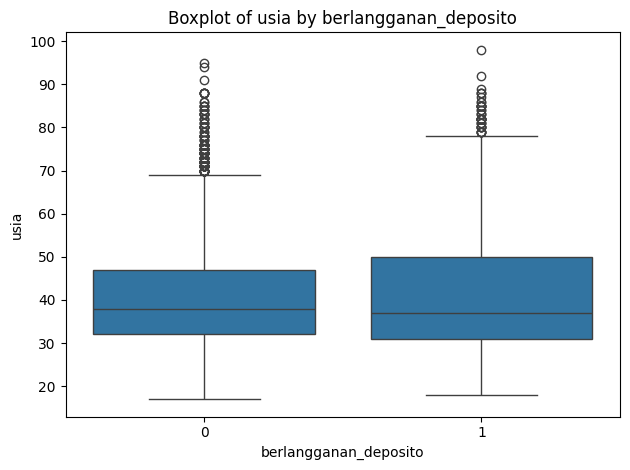

In [8]:
boxplot("usia")

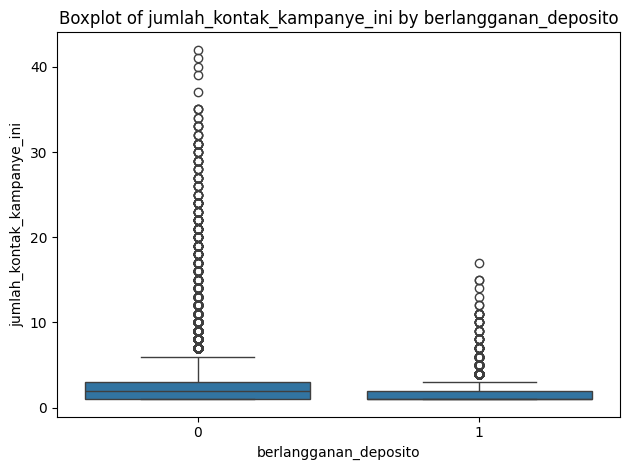

In [9]:
boxplot("jumlah_kontak_kampanye_ini")


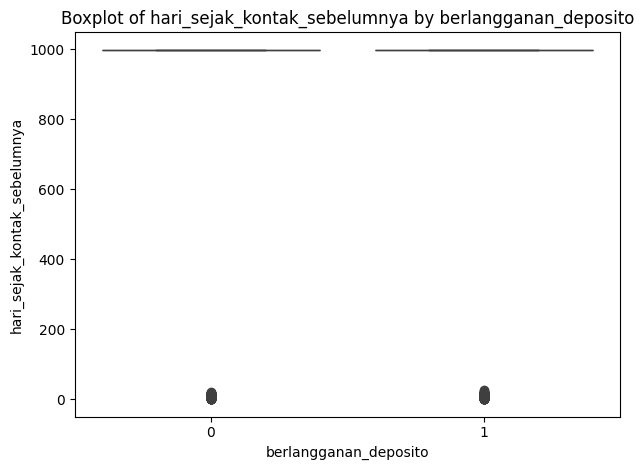

In [10]:
boxplot("hari_sejak_kontak_sebelumnya")

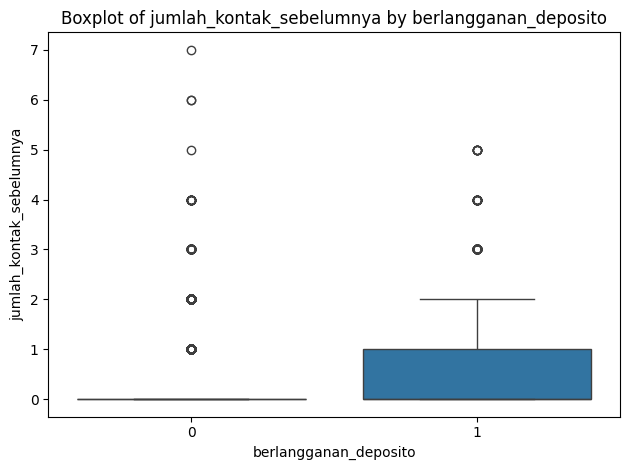

In [11]:
boxplot("jumlah_kontak_sebelumnya")

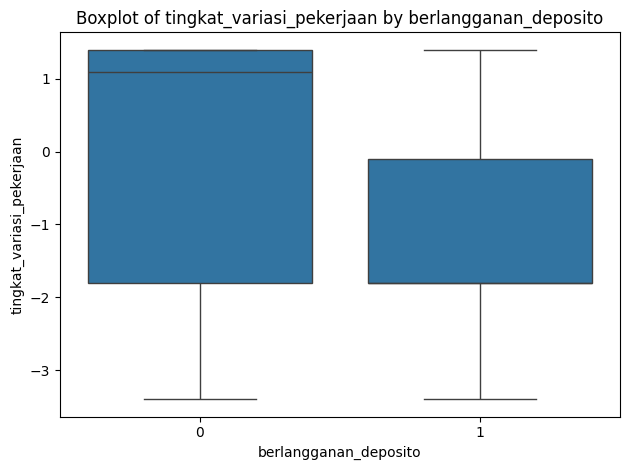

In [12]:
boxplot("tingkat_variasi_pekerjaan")

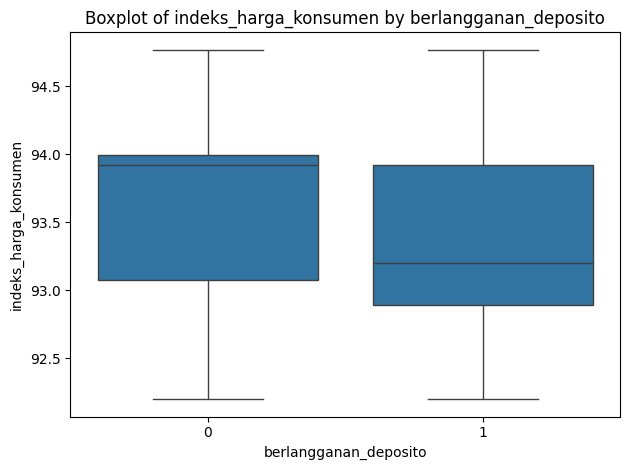

In [13]:
boxplot("indeks_harga_konsumen")

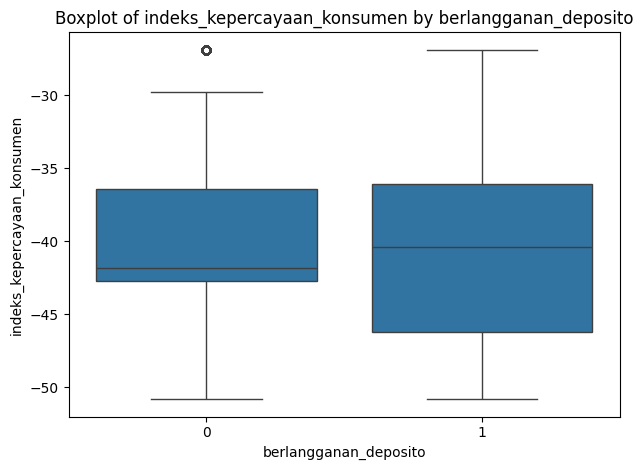

In [14]:
boxplot("indeks_kepercayaan_konsumen")

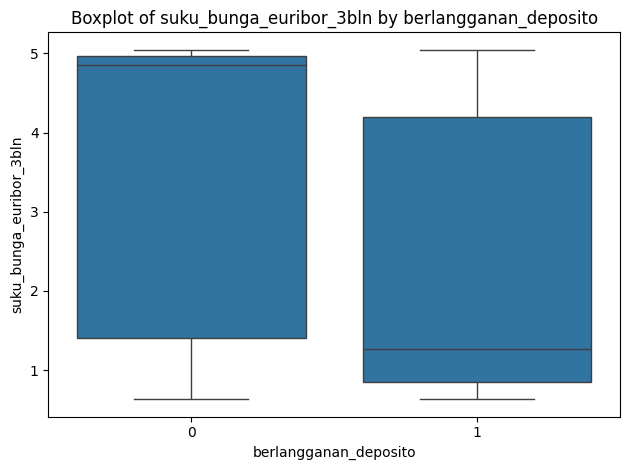

In [15]:
boxplot("suku_bunga_euribor_3bln")

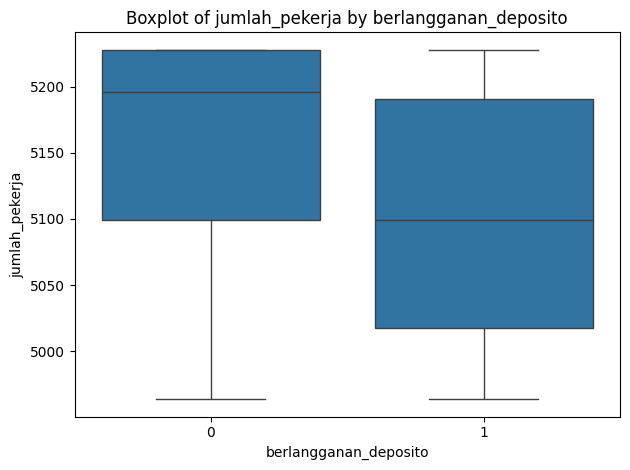

In [16]:
boxplot("jumlah_pekerja")